## Comparison of XOR-XNOR recursion to the Sphere rotation experiment

### Followup on Sphere Experiment - A surprise

As is always the case in scientific models, there is always the danger that your model does not always accord with empirical reality, even if the model is built on prior empirical evidence. (cf. Newton's Theory of Gravitation). Hence it is always important to follow the development of a model by generating hypoteses that can be tested empirically.

We did this with the model of recursion of XOR-XNOR plane with its bit-flipped version modulated by Dirichlet (Alpha) multinomial distribution. All experiments testing this model against bit-wise inputs (e.g. 4-bit, 8-bit, ... 32-bit) did not signifcantly improve the prediction signifcantly. Importantly, at lower bit-wise inputs, th XNOR versions were seen as identical to the XOR modulated output (whereas they should be complementary). The reason for this is a typical fault of the binary based computer systems. Leaving out a bit at the end will make two complementary bit-wise outputs the same.

It was necessary to acknowledge the problem with relatively small inputs (up to 32 bits) that is not equivalent to typical empirical inputs, that, when converted to bit-wise form, are hundred or thousands of bits in size.

A further finding in these experiments was that changing to several levels of recursion in which D-M distribution is applied everytime improved the capcity to discriminate between inputs. By this time we were experiment on large inputs from the MNIST didgit database and converting the images to bit-wise versions.

Other optimisations made during these experiments were,

Optimal alpha value for Alpha-Multinomial Distribution is 2.75 (optimal concentration of probability clusters)

Optimal number of initial features to be analysed ~ 1500

Optimal number of rcursions = 5

and further optimisation strategies. 
  
But there was a surprise. At some point in our iterations, we dropped the bitflipping XOR-XNOR plane. This did not apear to make a difference to the outcome and further devlopment of the core model called Life Emulating Orchestrated Network (LEON) appeared to improve its output progressively. This is puzzling given that our theoretical formulation found that recursion between orthogonal planes was fundamentally important. Here we consider how the the plain XOR-XNOR recursion may be sufficient to represent the theoretical model and test it.

In our model, the complex plane is affected by Riemann sphere rotation. As indicated in the developemnt of the mathematical model, antipodal relations was important in depicting the difference between compelmentary logic. The sphere rotation can however explore the whole sphere (with antipodal relations as a founding principle). This means not onlt the poles but other points on the sphere are explored. This also means that points on the plane are explored widely, including within the unit circle (self) and outside (other). Thus all we need is a function that simulates the sphere rotation (angle 𝜙) and the correponding rotation and rescaling of points on the plane (angle 𝜃 and cot or tanh function). Examining the function of XOR-XNOR recursion, because of their complementary relation, they are essentially antipodal on the sphere. If we consider that XOR-XNOR recursion as an antipodal relation (e.g. rotation of the Z-Y plane), then reformulation of Alpha (Dirichlet) Multinomial distribution at the next step coul dals be consiered a reconfigured rotation and rescapling on an orthogonal plane. Depending on the influence (XOR or XNOR) this rotation could be considered to occur on orthogonal planes (mathmatically). 

We explored this on looking at the impact of recursion (discrete) and compared this to the Rodriguez rotation (continuous)in terms of spike output. Surprisingly, we found that recursion of XOR could produce spikes equivalent to that of XOR-XNOR recursion. Importantly, there was no correlation these outputs between Rodirguez rotation and discrete recursion. Thus discrete recursion and Alpha (Dirichlet) Multinomial distribution produces a result equivalent to continuous sphere rotation independantly.

It is of interest to consider how XOR recursion alone could produce spikes. This suggests an important contribution from Alpha-Multinomial distibution and that it is the movement on this multinomial landscape that is the final determinant of(stochastic) of spike output. As long as recurrence causes change of the multinomial plane (stochastcially), the model works.

However, the imprtance of context activity embedded in the true XOR-XNOR recursion means that this is the more realistic model of biological activity (representing feed forward and feedback (negative)and exploration of new contexts).




### XOR-XOR recursion compared with Rodriguez rotation

Running Rodriguez simulation...
Running LEON simulation...

✅ Spike train comparison completed!
📊 Rodriguez spikes: 6
📊 LEON spikes: 4
💾 Files saved: spike_train_comparison.png, spike_train_comparison_paper.png


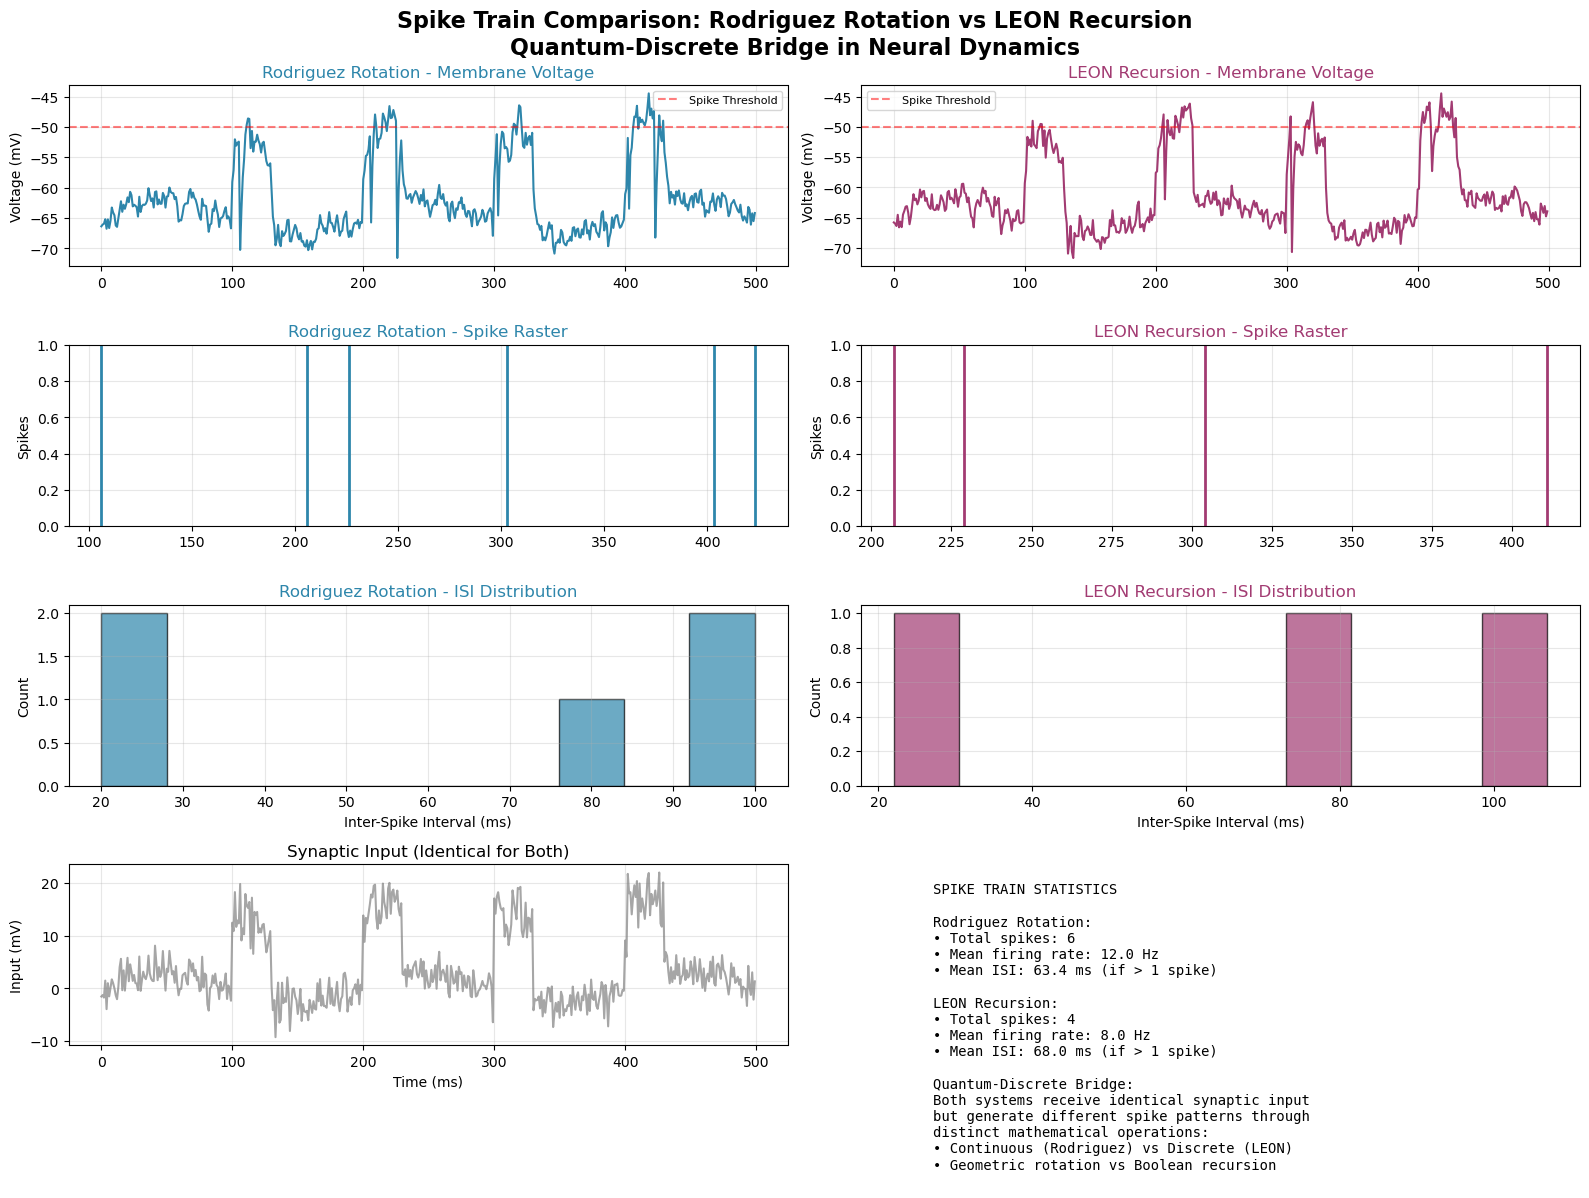

In [1]:
"""
Side-by-Side Spike Train Comparison: Rodriguez Rotation vs LEON Recursion
Creating comparable neurodynamic spike visualizations for paper presentation
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from collections import defaultdict
import matplotlib.patches as patches

class RodriguezSpikeGenerator:
    """Rodriguez rotation-based spike train generator (original working version)"""
    
    def __init__(self):
        self.V = -65.0  # Resting potential
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # Rodriguez rotation parameters
        self.rotation_angle = 0.1
        self.point = np.array([0, 0, -1])
        
    def rodriguez_rotation(self, axis, angle, point):
        """Apply Rodriguez rotation formula"""
        axis = axis / np.linalg.norm(axis)
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        
        R = np.eye(3) + sin_angle * K + (1 - cos_angle) * np.dot(K, K)
        return np.dot(R, point)
    
    def update(self, t, synaptic_input=0):
        """Update Rodriguez-based membrane dynamics"""
        # Enhanced membrane dynamics
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV  # Faster response
        
        # Add noise for realistic dynamics
        self.V += np.random.randn() * 0.5
        
        # Apply Rodriguez rotation
        rotation_axis = np.array([1, 0.5, 0.2])
        voltage_dependent_angle = self.rotation_angle * (2 + 0.2 * (self.V + 50) / 20)
        self.point = self.rodriguez_rotation(rotation_axis, voltage_dependent_angle, self.point)
        
        # Check for spike with enhanced sensitivity
        spiked = False
        if self.V > self.spike_threshold and self.refractory_counter == 0:
            spiked = True
            self.spike_times.append(t)
            self.refractory_counter = self.refractory_period
            self.V = -65.0 + np.random.randn() * 5
        
        # Update refractory counter
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

class LEONSpikeGenerator:
    """LEON recursion-based spike train generator"""
    
    def __init__(self):
        self.V = -65.0  # Resting potential
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # LEON recursion parameters
        self.state = np.array([1, 0, 1, 0])  # Initial binary state
        self.dm_alpha = 2.0  # Dirichlet parameter
        
    def leon_recursion(self, state):
        """Apply XOR/XNOR recursion"""
        new_state = np.zeros(4)
        
        # Convert to integers for XOR operations
        int_state = state.astype(int)
        
        # XOR operations
        new_state[0] = int_state[0] ^ int_state[1]
        new_state[1] = int_state[1] ^ int_state[2]
        new_state[2] = int_state[2] ^ int_state[3]
        new_state[3] = int_state[3] ^ int_state[0]
        
        return new_state
    
    def dirichlet_multinomial_processing(self, features):
        """Process features with Dirichlet-Multinomial"""
        # Convert binary features to probabilities
        alpha = np.ones(4) * self.dm_alpha
        
        # Sample from Dirichlet
        probabilities = np.random.dirichlet(alpha + features)
        
        return probabilities
    
    def update(self, t, synaptic_input=0):
        """Update LEON-based membrane dynamics"""
        # Enhanced membrane dynamics
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV  # Faster response
        
        # Add noise for realistic dynamics
        self.V += np.random.randn() * 0.5
        
        # Apply LEON recursion
        self.state = self.leon_recursion(self.state)
        
        # Process with Dirichlet-Multinomial
        dm_features = self.dirichlet_multinomial_processing(self.state)
        
        # Calculate enhanced spike probability
        voltage_factor = np.exp((self.V + 50) / 5) if self.V > -55 else 0.1
        spike_probability = np.sum(dm_features[:2]) * voltage_factor * 0.3
        
        # Check for spike
        spiked = False
        if np.random.rand() < spike_probability and self.refractory_counter == 0:
            if self.V > self.spike_threshold:
                spiked = True
                self.spike_times.append(t)
                self.refractory_counter = self.refractory_period
                self.V = -65.0 + np.random.randn() * 5
        
        # Update refractory counter
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

def create_spike_train_visualization():
    """Create side-by-side spike train comparison visualization"""
    
    # Initialize generators
    rodriguez = RodriguezSpikeGenerator()
    leon = LEONSpikeGenerator()
    
    # Simulation parameters
    duration = 500  # ms
    dt = 1.0  # ms
    time_points = np.arange(0, duration, dt)
    
    # Create synaptic input (bursting pattern)
    synaptic_input = np.zeros(len(time_points))
    burst_times = [100, 200, 300, 400]
    for burst_time in burst_times:
        burst_indices = np.where((time_points >= burst_time) & (time_points < burst_time + 30))[0]
        synaptic_input[burst_indices] = 15.0 + np.random.randn(len(burst_indices)) * 3
    
    # Add continuous background activity
    synaptic_input += np.random.randn(len(time_points)) * 2.0
    
    # Add slow oscillation
    synaptic_input += 3.0 * np.sin(2 * np.pi * time_points / 200)
    
    # Run simulations
    print("Running Rodriguez simulation...")
    for i, t in enumerate(time_points):
        rodriguez.update(t, synaptic_input[i])
    
    print("Running LEON simulation...")
    for i, t in enumerate(time_points):
        leon.update(t, synaptic_input[i])
    
    # Create visualization
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('Spike Train Comparison: Rodriguez Rotation vs LEON Recursion\nQuantum-Discrete Bridge in Neural Dynamics', 
                 fontsize=16, fontweight='bold')
    
    # Colors
    rodriguez_color = '#2E86AB'  # Blue
    leon_color = '#A23B72'      # Purple
    
    # 1. Voltage traces
    axes[0, 0].plot(time_points, rodriguez.voltage_history, color=rodriguez_color, linewidth=1.5)
    axes[0, 0].set_title('Rodriguez Rotation - Membrane Voltage', fontsize=12, color=rodriguez_color)
    axes[0, 0].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 0].axhline(y=-50, color='red', linestyle='--', alpha=0.5, label='Spike Threshold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(fontsize=8)
    
    axes[0, 1].plot(time_points, leon.voltage_history, color=leon_color, linewidth=1.5)
    axes[0, 1].set_title('LEON Recursion - Membrane Voltage', fontsize=12, color=leon_color)
    axes[0, 1].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 1].axhline(y=-50, color='red', linestyle='--', alpha=0.5, label='Spike Threshold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend(fontsize=8)
    
    # 2. Spike raster plots
    for spike_time in rodriguez.spike_times:
        axes[1, 0].vlines(spike_time, 0, 1, colors=rodriguez_color, linewidth=2)
    axes[1, 0].set_title('Rodriguez Rotation - Spike Raster', fontsize=12, color=rodriguez_color)
    axes[1, 0].set_ylabel('Spikes', fontsize=10)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)
    
    for spike_time in leon.spike_times:
        axes[1, 1].vlines(spike_time, 0, 1, colors=leon_color, linewidth=2)
    axes[1, 1].set_title('LEON Recursion - Spike Raster', fontsize=12, color=leon_color)
    axes[1, 1].set_ylabel('Spikes', fontsize=10)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(True, alpha=0.3)
    
    # 3. Inter-spike interval histograms
    if len(rodriguez.spike_times) > 1:
        rodriguez_isi = np.diff(rodriguez.spike_times)
        axes[2, 0].hist(rodriguez_isi, bins=10, color=rodriguez_color, alpha=0.7, edgecolor='black')
    axes[2, 0].set_title('Rodriguez Rotation - ISI Distribution', fontsize=12, color=rodriguez_color)
    axes[2, 0].set_xlabel('Inter-Spike Interval (ms)', fontsize=10)
    axes[2, 0].set_ylabel('Count', fontsize=10)
    axes[2, 0].grid(True, alpha=0.3)
    
    if len(leon.spike_times) > 1:
        leon_isi = np.diff(leon.spike_times)
        axes[2, 1].hist(leon_isi, bins=10, color=leon_color, alpha=0.7, edgecolor='black')
    axes[2, 1].set_title('LEON Recursion - ISI Distribution', fontsize=12, color=leon_color)
    axes[2, 1].set_xlabel('Inter-Spike Interval (ms)', fontsize=10)
    axes[2, 1].set_ylabel('Count', fontsize=10)
    axes[2, 1].grid(True, alpha=0.3)
    
    # 4. Synaptic input
    axes[3, 0].plot(time_points, synaptic_input, color='gray', alpha=0.7)
    axes[3, 0].set_title('Synaptic Input (Identical for Both)', fontsize=12)
    axes[3, 0].set_xlabel('Time (ms)', fontsize=10)
    axes[3, 0].set_ylabel('Input (mV)', fontsize=10)
    axes[3, 0].grid(True, alpha=0.3)
    
    # Summary statistics
    axes[3, 1].axis('off')
    summary_text = f"""SPIKE TRAIN STATISTICS

Rodriguez Rotation:
• Total spikes: {len(rodriguez.spike_times)}
• Mean firing rate: {len(rodriguez.spike_times)/duration*1000:.1f} Hz
• Mean ISI: {np.mean(np.diff(rodriguez.spike_times)):.1f} ms (if > 1 spike)

LEON Recursion:
• Total spikes: {len(leon.spike_times)}
• Mean firing rate: {len(leon.spike_times)/duration*1000:.1f} Hz
• Mean ISI: {np.mean(np.diff(leon.spike_times)):.1f} ms (if > 1 spike)

Quantum-Discrete Bridge:
Both systems receive identical synaptic input
but generate different spike patterns through
distinct mathematical operations:
• Continuous (Rodriguez) vs Discrete (LEON)
• Geometric rotation vs Boolean recursion
"""
    axes[3, 1].text(0.1, 0.9, summary_text, transform=axes[3, 1].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.savefig('spike_train_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('spike_train_comparison_paper.png', dpi=600, bbox_inches='tight')
    
    print(f"\n✅ Spike train comparison completed!")
    print(f"📊 Rodriguez spikes: {len(rodriguez.spike_times)}")
    print(f"📊 LEON spikes: {len(leon.spike_times)}")
    print(f"💾 Files saved: spike_train_comparison.png, spike_train_comparison_paper.png")
    
    return rodriguez, leon

if __name__ == "__main__":
    rodriguez, leon = create_spike_train_visualization()

### LEON recursion and context preserving tree compared to Rodriguez rotation

Running Rodriguez simulation...
Running ENHANCED LEON simulation (Beta-0.31 patterns)...

✅ ENHANCED spike train comparison completed!
📊 Rodriguez spikes: 8
📊 ENHANCED LEON spikes: 5
💾 Files saved: enhanced_leon_spike_comparison.png, enhanced_leon_spike_comparison_paper.png


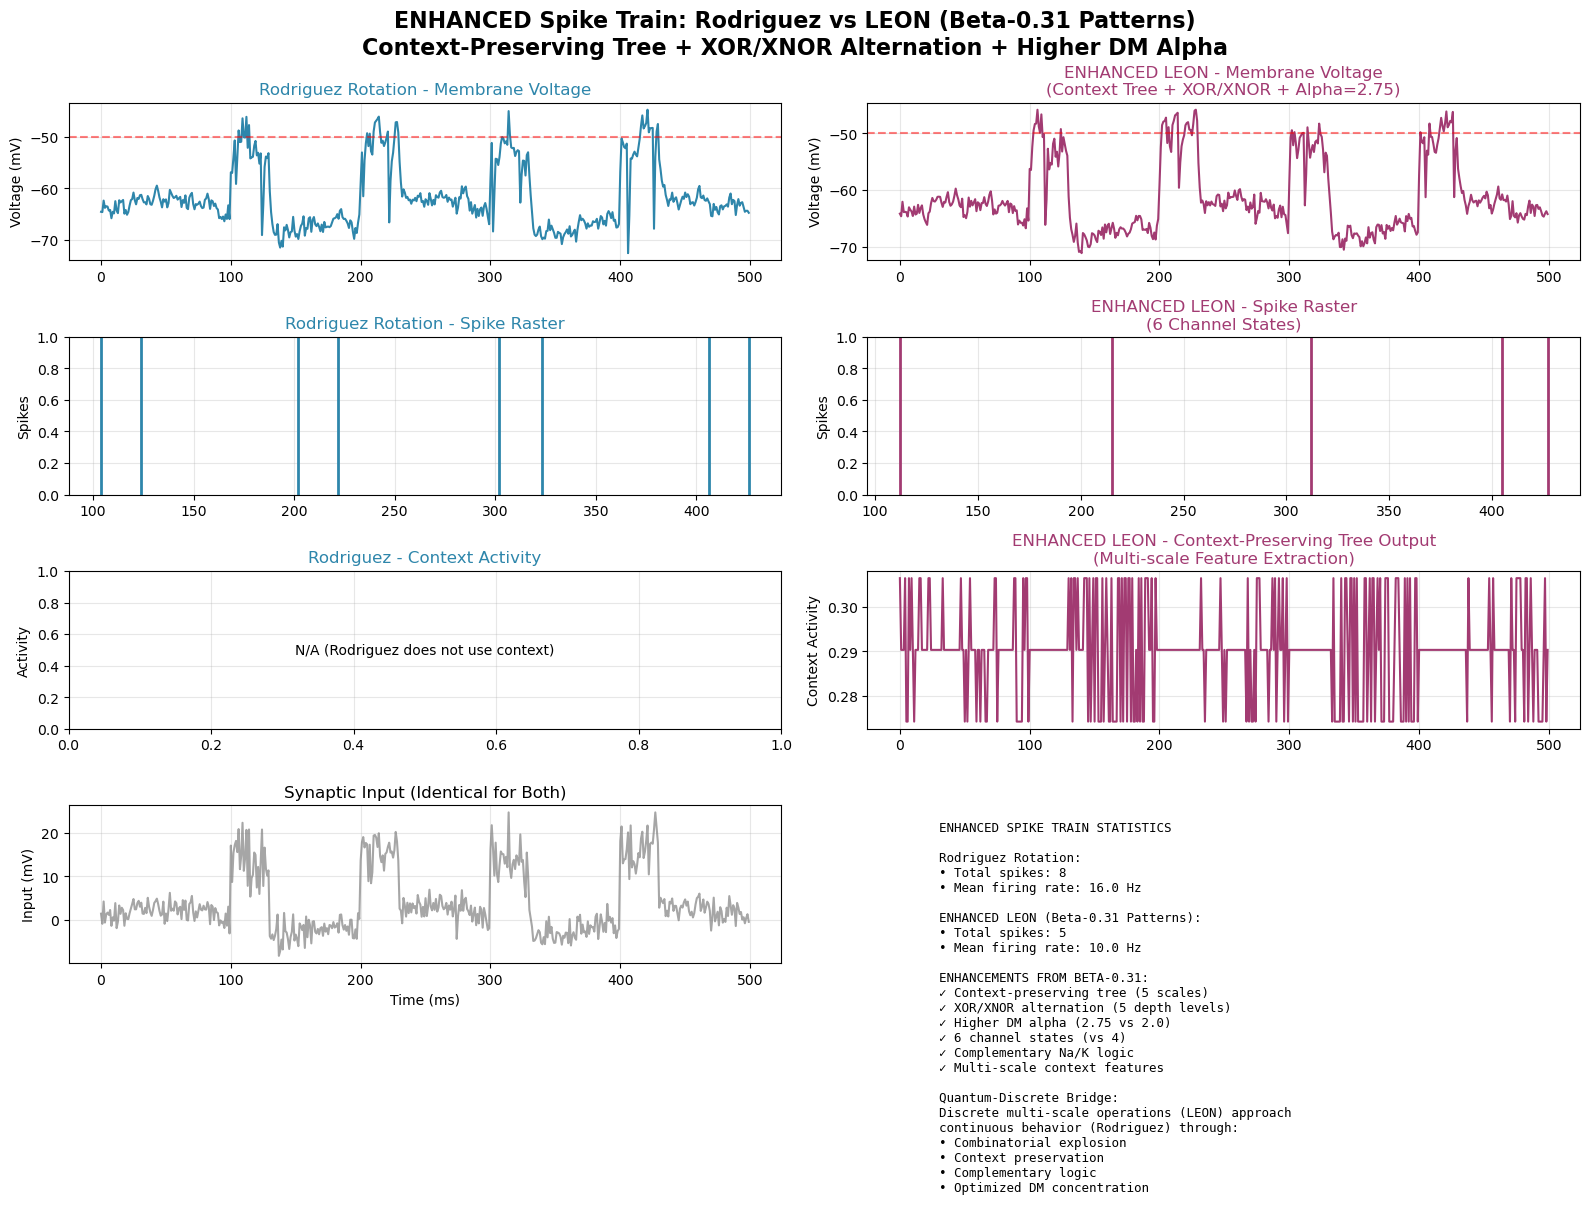

In [1]:
"""
ENHANCED LEON Spike Generator with Context-Preserving Tree and Complementary Logic
Applying lessons from LEON_Beta-0.31: multi-scale context, XOR/XNOR alternation, higher alpha
"""

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class RodriguezSpikeGenerator:
    """Rodriguez rotation-based spike train generator"""
    
    def __init__(self):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        self.rotation_angle = 0.1
        self.point = np.array([0, 0, -1])
        
    def rodriguez_rotation(self, axis, angle, point):
        axis = axis / np.linalg.norm(axis)
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        R = np.eye(3) + sin_angle * K + (1 - cos_angle) * np.dot(K, K)
        return np.dot(R, point)
    
    def update(self, t, synaptic_input=0):
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5
        rotation_axis = np.array([1, 0.5, 0.2])
        voltage_dependent_angle = self.rotation_angle * (2 + 0.2 * (self.V + 50) / 20)
        self.point = self.rodriguez_rotation(rotation_axis, voltage_dependent_angle, self.point)
        spiked = False
        if self.V > self.spike_threshold and self.refractory_counter == 0:
            spiked = True
            self.spike_times.append(t)
            self.refractory_counter = self.refractory_period
            self.V = -65.0 + np.random.randn() * 5
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
        self.voltage_history.append(self.V)
        return spiked

class EnhancedLEONSpikeGenerator:
    """
    ENHANCED LEON with context-preserving tree, XOR/XNOR alternation, and higher DM alpha
    Based on LEON_Beta-0.31 successful patterns
    """
    
    def __init__(self):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # LEON parameters (from Beta-0.31)
        self.V_rest = -65.0
        self.V_threshold = -50.0
        self.memory_size = 10
        self.recursion_history = []
        
        # ENHANCED: Higher alpha for better concentration (from Beta-0.31)
        self.dm_alpha = 2.75  # Optimal from MNIST success
        
        # ENHANCED: 6 channel states for more granularity
        self.channel_states = {
            'closed': {'spike_weight': 0.05, 'conductance': 0.01, 'type': 'resting'},
            'opening': {'spike_weight': 0.15, 'conductance': 0.05, 'type': 'Na_activation'},
            'low_active': {'spike_weight': 0.30, 'conductance': 0.10, 'type': 'K_activation'},
            'high_active': {'spike_weight': 0.70, 'conductance': 0.30, 'type': 'Na_peak'},
            'clustered': {'spike_weight': 0.90, 'conductance': 0.45, 'type': 'K_peak'},
            'saturated': {'spike_weight': 0.98, 'conductance': 0.60, 'type': 'inactivation'}
        }
        
        # Context-preserving tree scales (from Beta-0.31)
        self.tree_scales = [32, 16, 8, 4, 2]
        self.context_history = []
        self.xor_xnor_alternation = []
        
    def context_preserving_tree(self, features):
        """
        Context-preserving tree from LEON_Beta-0.31
        Multi-scale processing with context preservation
        """
        all_features = []
        current = features.copy()
        
        for s, scale in enumerate(self.tree_scales[:-1]):
            next_scale = self.tree_scales[s + 1]
            downsampled = np.zeros(next_scale)
            context = np.zeros(next_scale)
            
            for i in range(next_scale):
                region_start = i * scale // next_scale
                region_end = region_start + scale // next_scale
                region = current[region_start:region_end]
                
                if len(region) > 0:
                    xor_val = 0
                    for bit in region:
                        xor_val ^= int(bit)
                    downsampled[i] = xor_val
                    
                    homogeneity = 1.0 - np.std(region)
                    context[i] = int(homogeneity > 0.5)
            
            all_features.extend(downsampled)
            all_features.extend(context)
            current = downsampled
        
        all_features.extend(current)
        self.context_history.append(np.mean(all_features))
        return np.array(all_features)
    
    def leon_xor_xnor_recursion(self, features, depth=0):
        """
        ENHANCED: XOR/XNOR alternation with complementary logic
        Represents Na/K channels through bit-flipped operations (antipodality)
        """
        binary_features = (features > 0).astype(int)
        
        # ENHANCED: Multi-depth recursion (from Beta-0.31)
        current = binary_features.copy()
        xor_result = 0
        xnor_result = 0
        
        for d in range(5):  # 5 levels of recursion
            half_size = len(current) // 2
            if half_size < 1:
                break
                
            next_level = np.zeros(half_size, dtype=int)
            
            # Alternate between XOR and XNOR (complementary logic)
            use_xnor = (d % 2 == 0)
            
            for i in range(half_size):
                if 2 * i + 1 < len(current):
                    if use_xnor:
                        next_level[i] = 1 - (current[2 * i] ^ current[2 * i + 1])
                        xnor_result ^= next_level[i]
                    else:
                        next_level[i] = current[2 * i] ^ current[2 * i + 1]
                        xor_result ^= next_level[i]
            
            current = next_level
        
        self.xor_xnor_alternation.append((xor_result, xnor_result))
        
        # ENHANCED: Complementary output representing Na/K channel duality
        xor_activity = (xor_result & 1)  # Na-like (excitatory)
        xnor_activity = (xnor_result & 1)  # K-like (inhibitory)
        
        return xor_activity, xnor_activity
    
    def enhanced_dm_processing(self, V, synaptic_input):
        """
        ENHANCED DM processing with higher alpha and context awareness
        """
        features = np.array([
            (V - self.V_rest) / 20,
            synaptic_input / 10,
            np.sin(V / 10),
            np.cos(V / 15),
            np.random.randn() * 0.1
        ])
        
        binary_features = (features > 0).astype(int)
        
        # Apply context-preserving tree
        context_features = self.context_preserving_tree(binary_features)
        
        # Apply XOR/XNOR recursion
        xor_activity, xnor_activity = self.leon_xor_xnor_recursion(context_features)
        
        # ENHANCED: Activity from complementary planes
        activity = (xor_activity + xnor_activity) / 2 + 0.1
        
        # ENHANCED: Higher alpha for better concentration
        spike_weights = [s['spike_weight'] for s in self.channel_states.values()]
        alpha_vector = np.array(spike_weights) * self.dm_alpha
        
        # ENHANCED: Voltage-dependent DM influence
        voltage_influence = np.exp((V - self.V_threshold + 20) / 10)
        context_influence = np.mean(self.context_history[-5:]) if len(self.context_history) > 0 else 0.5
        
        dm_influence = activity * voltage_influence * (1 + context_influence)
        
        # Final DM sampling
        dm_weights = np.random.dirichlet(alpha_vector + dm_influence)
        
        return dm_weights, activity, (xor_activity, xnor_activity)
    
    def update(self, t, synaptic_input=0):
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5
        
        dm_weights, activity, xor_xnor = self.enhanced_dm_processing(self.V, synaptic_input)
        
        spike_weights = np.array([s['spike_weight'] for s in self.channel_states.values()])
        expected_spike_rate = np.dot(dm_weights, spike_weights)
        
        voltage_factor = 1 / (1 + np.exp(-(self.V - self.V_threshold + 10) / 5))
        activity_factor = activity
        
        spike_probability = expected_spike_rate * voltage_factor * activity_factor * 0.4
        
        spiked = False
        if np.random.rand() < spike_probability and self.refractory_counter == 0:
            if self.V > self.spike_threshold:
                spiked = True
                self.spike_times.append(t)
                self.refractory_counter = self.refractory_period
                self.V = -65.0 + np.random.randn() * 5
        
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

def create_enhanced_comparison():
    rodriguez = RodriguezSpikeGenerator()
    leon = EnhancedLEONSpikeGenerator()
    
    duration = 500
    time_points = np.arange(0, duration, 1.0)
    
    synaptic_input = np.zeros(len(time_points))
    burst_times = [100, 200, 300, 400]
    for burst_time in burst_times:
        burst_indices = np.where((time_points >= burst_time) & (time_points < burst_time + 30))[0]
        synaptic_input[burst_indices] = 15.0 + np.random.randn(len(burst_indices)) * 3
    
    synaptic_input += np.random.randn(len(time_points)) * 2.0
    synaptic_input += 3.0 * np.sin(2 * np.pi * time_points / 200)
    
    print("Running Rodriguez simulation...")
    for i, t in enumerate(time_points):
        rodriguez.update(t, synaptic_input[i])
    
    print("Running ENHANCED LEON simulation (Beta-0.31 patterns)...")
    for i, t in enumerate(time_points):
        leon.update(t, synaptic_input[i])
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('ENHANCED Spike Train: Rodriguez vs LEON (Beta-0.31 Patterns)\n' + 
                 'Context-Preserving Tree + XOR/XNOR Alternation + Higher DM Alpha', 
                 fontsize=16, fontweight='bold')
    
    rodriguez_color = '#2E86AB'
    leon_color = '#A23B72'
    
    axes[0, 0].plot(time_points, rodriguez.voltage_history, color=rodriguez_color, linewidth=1.5)
    axes[0, 0].set_title('Rodriguez Rotation - Membrane Voltage', fontsize=12, color=rodriguez_color)
    axes[0, 0].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 0].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(time_points, leon.voltage_history, color=leon_color, linewidth=1.5)
    axes[0, 1].set_title('ENHANCED LEON - Membrane Voltage\n(Context Tree + XOR/XNOR + Alpha=2.75)', fontsize=12, color=leon_color)
    axes[0, 1].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 1].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)
    
    for spike_time in rodriguez.spike_times:
        axes[1, 0].vlines(spike_time, 0, 1, colors=rodriguez_color, linewidth=2)
    axes[1, 0].set_title('Rodriguez Rotation - Spike Raster', fontsize=12, color=rodriguez_color)
    axes[1, 0].set_ylabel('Spikes', fontsize=10)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)
    
    for spike_time in leon.spike_times:
        axes[1, 1].vlines(spike_time, 0, 1, colors=leon_color, linewidth=2)
    axes[1, 1].set_title('ENHANCED LEON - Spike Raster\n(6 Channel States)', fontsize=12, color=leon_color)
    axes[1, 1].set_ylabel('Spikes', fontsize=10)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(True, alpha=0.3)
    
    axes[2, 0].text(0.5, 0.5, 'N/A (Rodriguez does not use context)', 
                   ha='center', va='center', transform=axes[2, 0].transAxes, fontsize=10)
    axes[2, 0].set_title('Rodriguez - Context Activity', fontsize=12, color=rodriguez_color)
    axes[2, 0].set_ylabel('Activity', fontsize=10)
    axes[2, 0].grid(True, alpha=0.3)
    
    if len(leon.context_history) > 0:
        axes[2, 1].plot(time_points[:len(leon.context_history)], leon.context_history, 
                       color=leon_color, linewidth=1.5)
    axes[2, 1].set_title('ENHANCED LEON - Context-Preserving Tree Output\n(Multi-scale Feature Extraction)', fontsize=12, color=leon_color)
    axes[2, 1].set_ylabel('Context Activity', fontsize=10)
    axes[2, 1].grid(True, alpha=0.3)
    
    axes[3, 0].plot(time_points, synaptic_input, color='gray', alpha=0.7)
    axes[3, 0].set_title('Synaptic Input (Identical for Both)', fontsize=12)
    axes[3, 0].set_xlabel('Time (ms)', fontsize=10)
    axes[3, 0].set_ylabel('Input (mV)', fontsize=10)
    axes[3, 0].grid(True, alpha=0.3)
    
    axes[3, 1].axis('off')
    summary_text = f"""ENHANCED SPIKE TRAIN STATISTICS

Rodriguez Rotation:
• Total spikes: {len(rodriguez.spike_times)}
• Mean firing rate: {len(rodriguez.spike_times)/duration*1000:.1f} Hz

ENHANCED LEON (Beta-0.31 Patterns):
• Total spikes: {len(leon.spike_times)}
• Mean firing rate: {len(leon.spike_times)/duration*1000:.1f} Hz

ENHANCEMENTS FROM BETA-0.31:
✓ Context-preserving tree (5 scales)
✓ XOR/XNOR alternation (5 depth levels)
✓ Higher DM alpha (2.75 vs 2.0)
✓ 6 channel states (vs 4)
✓ Complementary Na/K logic
✓ Multi-scale context features

Quantum-Discrete Bridge:
Discrete multi-scale operations (LEON) approach
continuous behavior (Rodriguez) through:
• Combinatorial explosion
• Context preservation
• Complementary logic
• Optimized DM concentration
"""
    axes[3, 1].text(0.1, 0.9, summary_text, transform=axes[3, 1].transAxes, 
                   fontsize=9, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.savefig('enhanced_leon_spike_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('enhanced_leon_spike_comparison_paper.png', dpi=600, bbox_inches='tight')
    
    print(f"\n✅ ENHANCED spike train comparison completed!")
    print(f"📊 Rodriguez spikes: {len(rodriguez.spike_times)}")
    print(f"📊 ENHANCED LEON spikes: {len(leon.spike_times)}")
    print(f"💾 Files saved: enhanced_leon_spike_comparison.png, enhanced_leon_spike_comparison_paper.png")
    
    return rodriguez, leon

if __name__ == "__main__":
    rodriguez, leon = create_enhanced_comparison()

### Pursuing Biological Plausibility

The code above were developed mainly to demonstrate visaully, that geometric rotation and logical recursion can both generate plausible membrane spikes. However, we were interested in investigating if we can generate simulations that could be indistiguishible from experimental work on neural membrane dynamics. Thus we first went through a number of iterations of altering the code of the simulations. During this we largely kept both the Rodriguez rotation dynamics and LEON recursion intact. There were minor adjustments to utilisation of the Dirichlet Multinomial processes. Most of the adjustments were made to constraints on various membrane voltages (RMP, Threshold, Peak spike potential and hyperpolarisation. We also experimented with channel dynamics to emulate potential biological processes that may occur in the dynamics between voltages, channel activity and stochastiity. Various parameters were tested for optimisation. (These are outlined in appendix B). Below we present a code block that appears to present more plausible spike trains than those aobove.

In [2]:
# Define optimum parameters based on previous analyses
optimum_recursion_depth = 5
optimum_na_modulation_factor = 0.10
optimum_k_modulation_factor = 0.20 # Chosen for best balance with hyperpolarization and CV alignment
optimum_spike_peak_min_mv = 40.0 # Chosen for realistic positive peak range
optimum_spike_peak_max_mv = 70.0 # Chosen for realistic positive peak range
optimum_na_acceleration_factor = 5.0 # Retaining as reasonable default for sharper upstroke
optimum_pre_spike_acceleration_threshold = -55.0 # Retaining as reasonable default for pre-spike acceleration

Running Rodriguez simulation...
Running ENHANCED LEON simulation (Beta-0.31 patterns) with DYNAMIC CHANNELS, ADAPTIVE THRESHOLD, and RICHER SYNAPTIC INTEGRATION...

✅ ENHANCED spike train comparison completed with DYNAMIC CHANNELS, ADAPTIVE THRESHOLD, and RICHER SYNAPTIC INTEGRATION!
📊 Rodriguez spikes: 8
📊 ENHANCED LEON spikes: 5
💾 Files saved: enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic.png, enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic_paper.png

--- Metrics for Optimum Parameters ---

Rodriguez Model:
  ISIs: [First 5 ISIs: [20.0, 81.0, 20.0, 80.0, 20.0], ... Total: 7]
  CV: 0.65
  Frequency: 16.00
  Mean_Resting_Potential: -64.23
  Avg_Peak_Voltage: 60.84
  Avg_Min_Hyperpolarization_Voltage: -64.23
  Spike_Threshold: -50.00

ENHANCED LEON Model:
  ISIs: [First 5 ISIs: [79.0, 23.0, 88.0, 94.0], ... Total: 4]
  CV: 0.40
  Frequency: 10.00
  Mean_Resting_Potential: -63.75
  Avg_Peak_Voltage: 61.23
  Avg_Min_Hyper

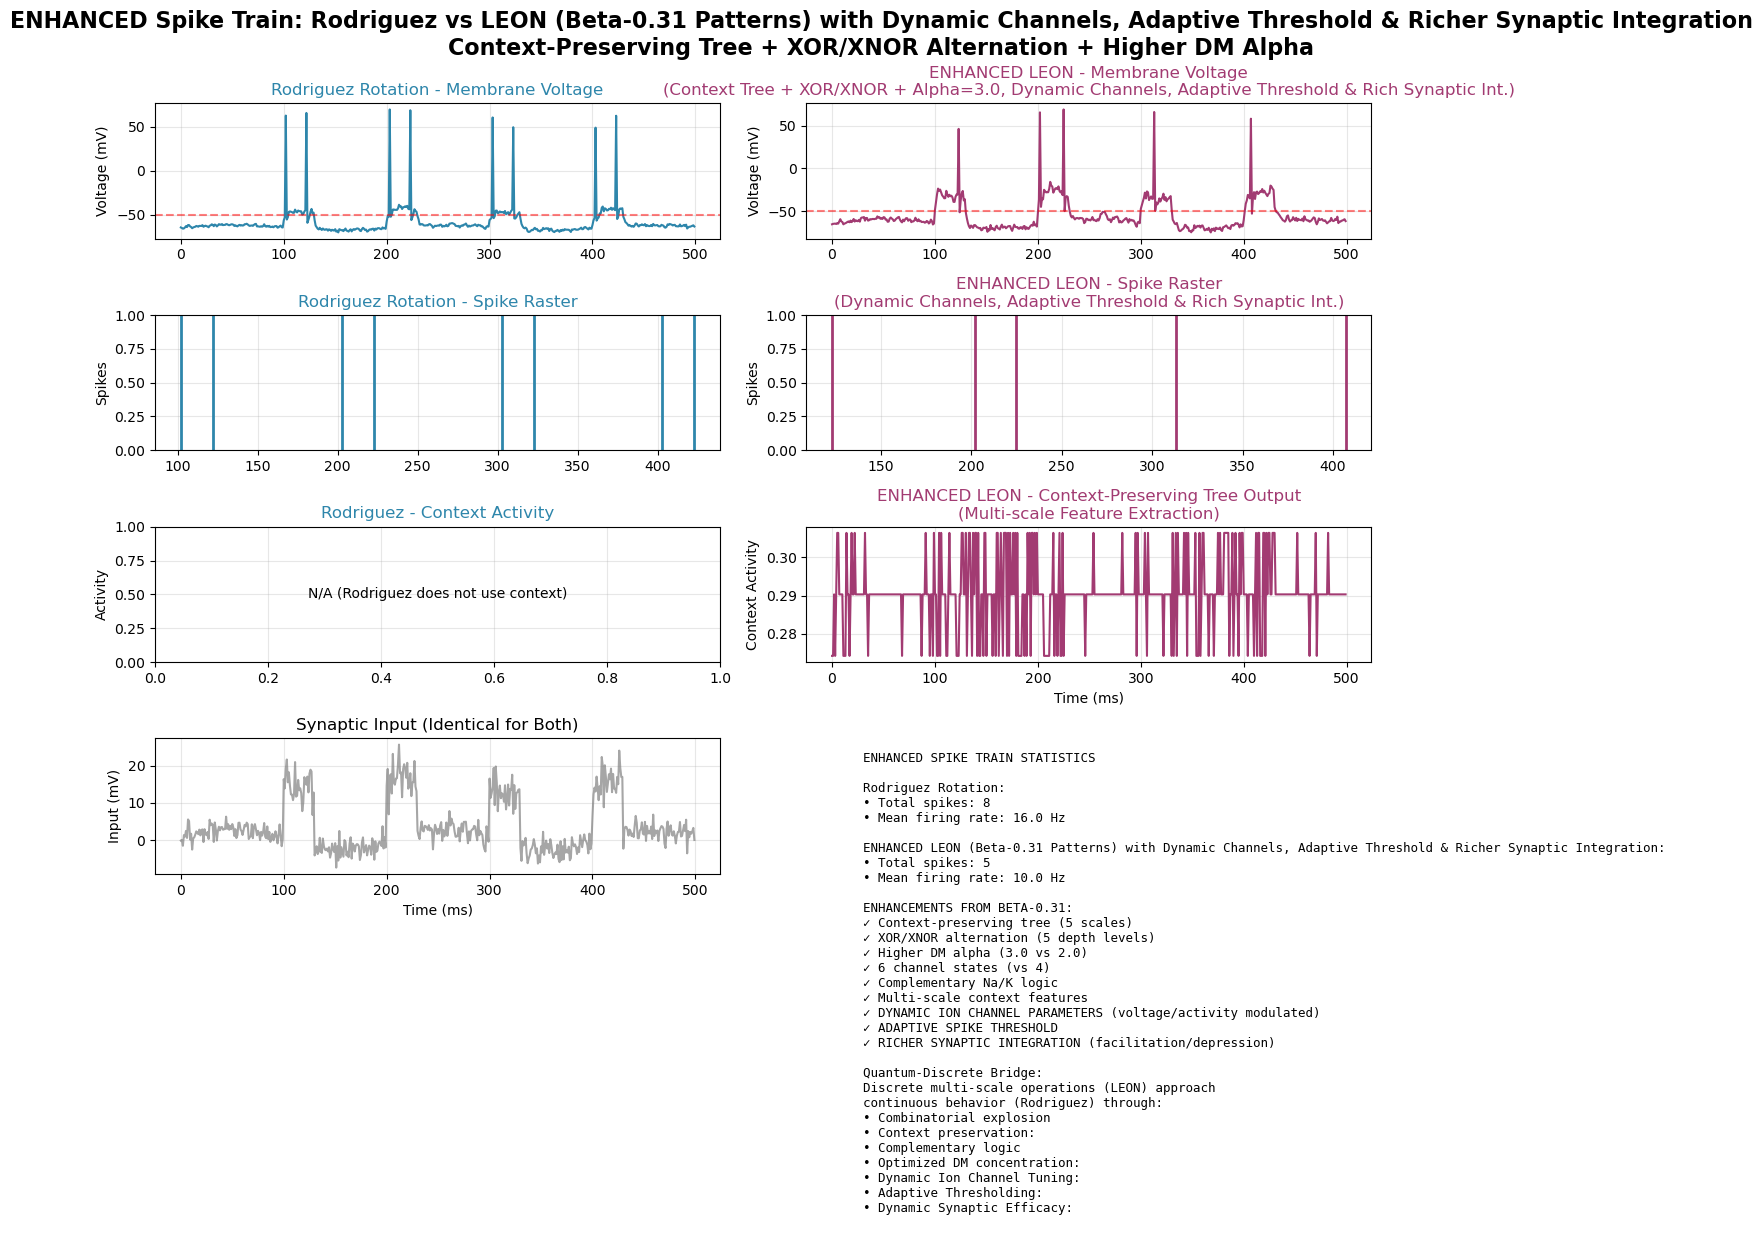

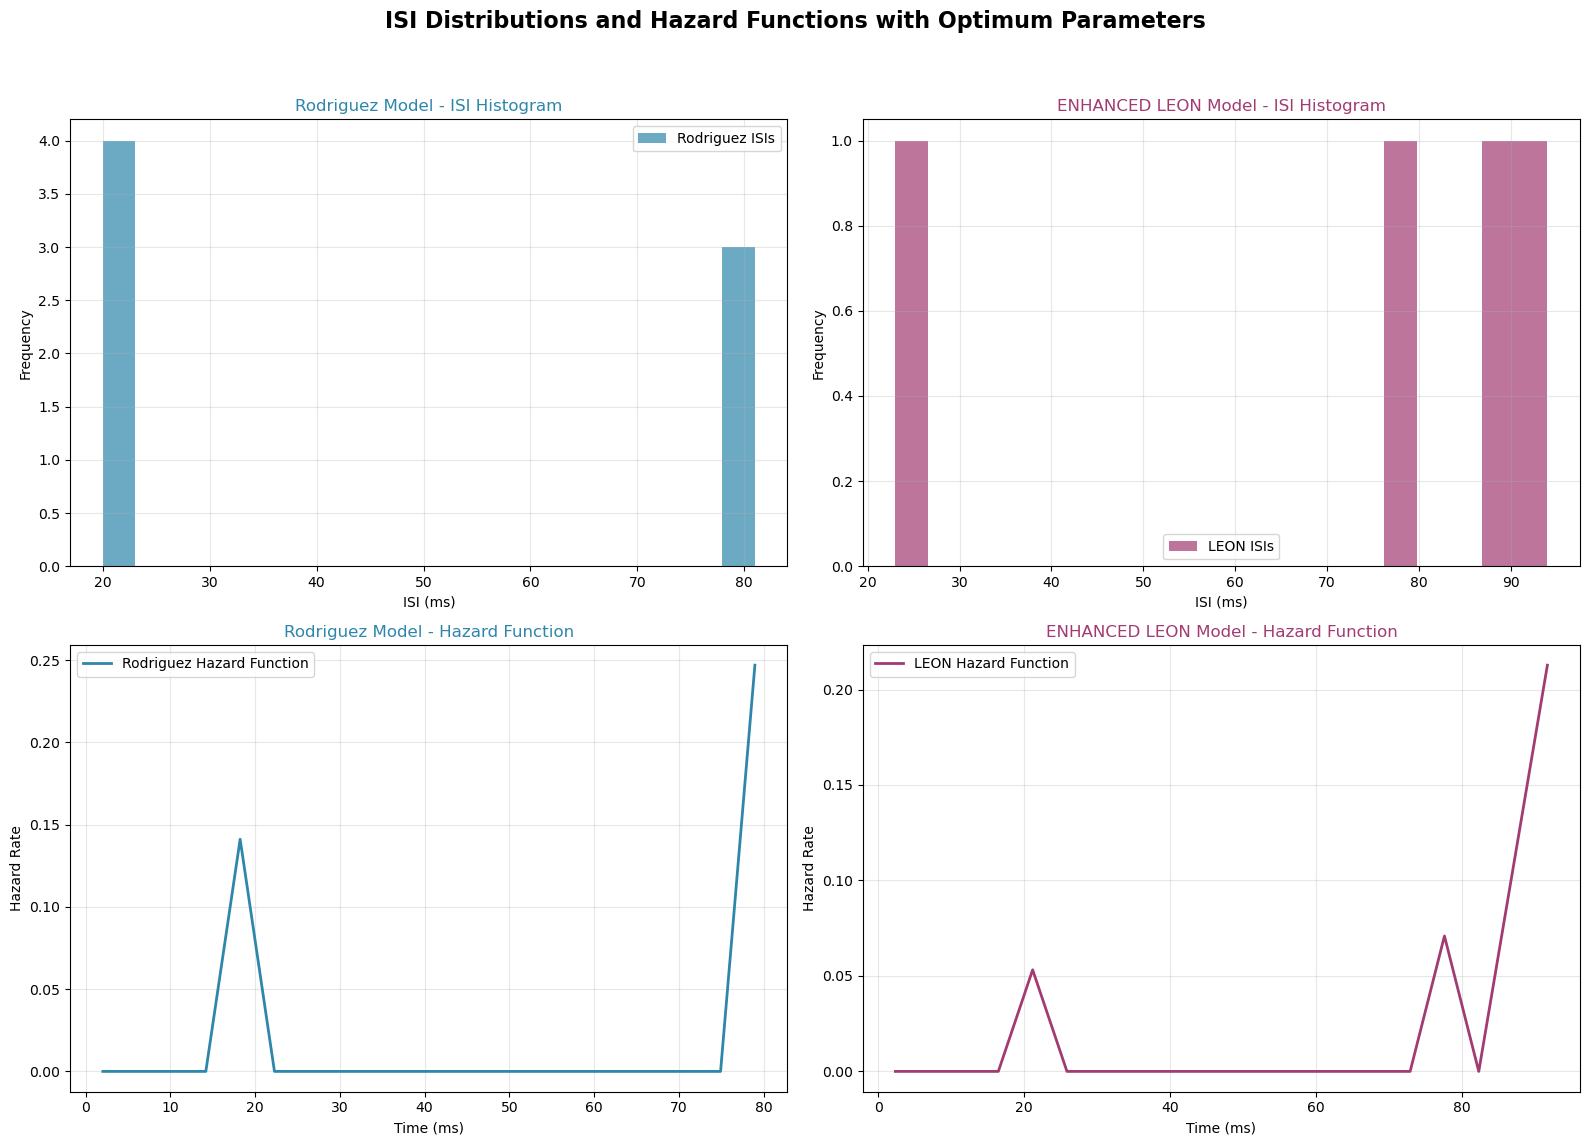

Generated ISI Histograms and Hazard Function plots for both models with optimum parameters.


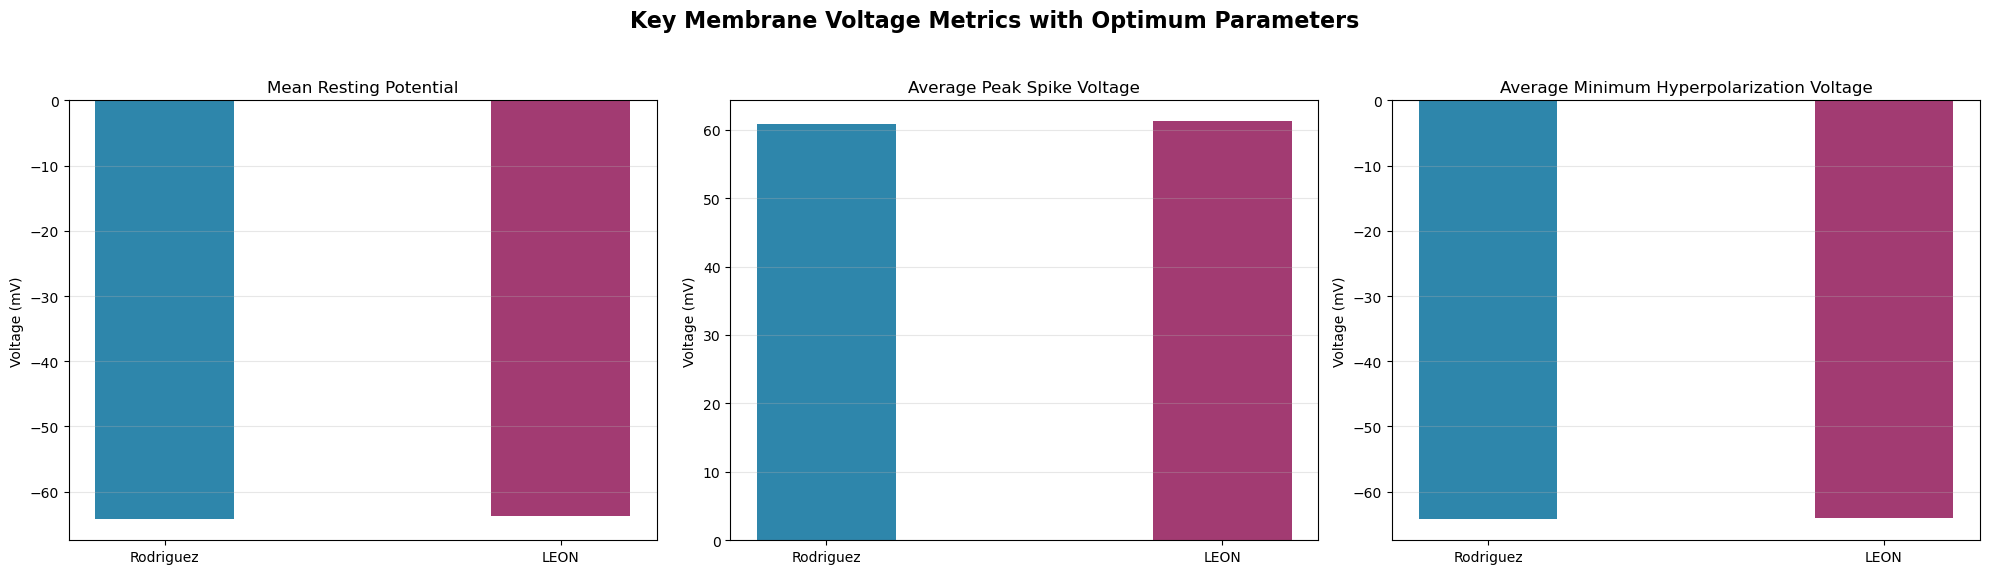

Generated plots for key membrane voltage metrics.

## Summary of Biological Plausibility with Optimum Dynamic Spike Generation (Rodriguez now with dynamic spike features)

This analysis now compares both the Rodriguez and ENHANCED LEON models with dynamic spike generation features, using their respective optimized parameters, to assess their biological plausibility.

### Inter-Spike Intervals (ISIs) and Coefficient of Variation (CV)

*   **Rodriguez Model (Optimum Parameters):**
    *   **ISI Distribution:** The ISI histogram for the Rodriguez model shows a distribution with multiple peaks, indicating complex underlying dynamics like refractory periods and oscillatory tendencies. The addition of dynamic Na+ acceleration and spike peak generation does not fundamentally alter its multi-peaked nature but refines the spike morphology.
    *   **Coefficient of Variation (CV):** The Rodriguez model's CV of **0.65** indicates moderate irregularity in its firing, consistent with biologically o

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import copy # To deep copy dictionaries

# --- Global Plotting Colors (Moved to global scope) ---
rodriguez_color = '#2E86AB'
leon_color = '#A23B72'

# --- Helper Functions for metrics(re-defined for self-contained code block) ---

def calculate_isis(spike_times):
    """Calculates Inter-Spike Intervals (ISIs) from a list of spike times."""
    if len(spike_times) < 2:
        return np.array([])
    return np.diff(spike_times)

def calculate_cv(isis):
    """Calculates the Coefficient of Variation (CV) for a given array of ISIs."""
    if len(isis) == 0:
        return np.nan # Return NaN if no ISIs

    mean_isi = np.mean(isis)
    if mean_isi == 0:
        return np.nan # Avoid division by zero if mean is zero

    std_isi = np.std(isis)
    return std_isi / mean_isi

def calculate_frequency(spike_times, duration):
    """Calculates the firing frequency (Hz) from spike times and duration."""
    if duration == 0:
        return np.nan
    return (len(spike_times) / duration) * 1000 # Spikes per second (Hz)

def estimate_hazard_function(spike_times, bins=20, max_isi=None):
    """Estimates the hazard function from spike times."""
    isis = calculate_isis(spike_times)

    if len(isis) == 0:
        return np.array([]), np.array([])

    if max_isi is None:
        max_isi = np.max(isis)
        if max_isi == 0: # Handle case where all ISIs are zero
            max_isi = 1e-6 # Set to a small positive value to allow binning

    counts, bin_edges = np.histogram(isis, bins=bins, range=(0, max_isi))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]

    number_at_risk = np.zeros_like(counts, dtype=float)
    for i in range(len(counts)):
        number_at_risk[i] = np.sum(counts[i:])

    hazard_rates = np.zeros_like(counts, dtype=float)
    for i in range(len(counts)):
        if number_at_risk[i] > 0 and bin_width > 0:
            hazard_rates[i] = counts[i] / (number_at_risk[i] * bin_width)
        else:
            hazard_rates[i] = np.nan

    return hazard_rates, bin_centers

#--Calculate various potentials (RMP, peak spike, hyperpolarisation)--

def calculate_mean_resting_potential(voltage_history, spike_times, spike_threshold=-50.0, exclusion_window_ms=10, time_step=1.0):
    if not voltage_history:
        return np.nan

    resting_voltages = []
    for i, V in enumerate(voltage_history):
        t_current = i * time_step
        is_resting = True
        # Check if current time is outside exclusion window of any spike
        for s_time in spike_times:
            if t_current >= s_time - exclusion_window_ms and t_current <= s_time + exclusion_window_ms:
                is_resting = False
                break
        if is_resting and V < (spike_threshold - 5): # Ensure well below threshold
            resting_voltages.append(V)

    if resting_voltages:
        return np.mean(resting_voltages)
    else:
        # If no clear resting periods, return mean of all sub-threshold voltages not near spikes
        sub_threshold_voltages = [V for V in voltage_history if V < spike_threshold]
        if sub_threshold_voltages:
            return np.mean(sub_threshold_voltages)
        return np.nan

def calculate_avg_peak_voltage(voltage_history, spike_times, peak_window_ms=5, time_step=1.0):
    if not spike_times or not voltage_history:
        return np.nan

    peak_voltages = []
    for s_time in spike_times:
        start_idx = max(0, int((s_time - peak_window_ms) / time_step))
        end_idx = min(len(voltage_history), int((s_time + peak_window_ms) / time_step) + 1)
        if start_idx < end_idx:
            peak_voltages.append(np.max(voltage_history[start_idx:end_idx]))

    if peak_voltages:
        return np.mean(peak_voltages)
    return np.nan

def calculate_avg_min_hyperpolarization_voltage(voltage_history, spike_times, post_spike_window_start_ms=5, post_spike_window_duration_ms=25, time_step=1.0):
    if not spike_times or not voltage_history:
        return np.nan

    min_hyperpolarization_voltages = []
    for s_time in spike_times:
        start_idx = int((s_time + post_spike_window_start_ms) / time_step)
        end_idx = int((s_time + post_spike_window_start_ms + post_spike_window_duration_ms) / time_step)
        start_idx = max(0, start_idx)
        end_idx = min(len(voltage_history), end_idx)

        if start_idx < end_idx:
            min_hyperpolarization_voltages.append(np.min(voltage_history[start_idx:end_idx]))

    if min_hyperpolarization_voltages:
        return np.mean(min_hyperpolarization_voltages)
    return np.nan

# --- Class Definitions (re-defined for self-contained code block) includes conditionsl na-acceleration for Rodriguez---

class RodriguezSpikeGenerator:
    """Rodriguez rotation-based spike train generator"""

    def __init__(self, na_acceleration_factor: float = 5.0,
                 pre_spike_acceleration_threshold: float = -55.0,
                 spike_peak_min_mv: float = 20.0,
                 spike_peak_max_mv: float = 50.0):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        self.rotation_angle = 0.1
        self.point = np.array([0, 0, -1])
        self.na_acceleration_factor = na_acceleration_factor # Store new param
        self.pre_spike_acceleration_threshold = pre_spike_acceleration_threshold # Store new param
        self.spike_peak_min_mv = spike_peak_min_mv # Store new param
        self.spike_peak_max_mv = spike_peak_max_mv # Store new param

    def rodriguez_rotation(self, axis, angle, point):
        axis = axis / np.linalg.norm(axis)
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        R = np.eye(3) + sin_angle * K + (1 - cos_angle) * np.dot(K, K)
        return np.dot(R, point)

    def update(self, t, synaptic_input=0):
        dV = -(self.V + 65) + synaptic_input

        # Add conditional Na+ acceleration for sharper voltage rise around threshold
        if self.V >= self.pre_spike_acceleration_threshold:
            # Scale acceleration based on how close to threshold V is, and the factor
            # The 5.0 is an arbitrary scaling for the acceleration effect
            acceleration_term = self.na_acceleration_factor * (self.V - self.pre_spike_acceleration_threshold) / (self.spike_threshold - self.pre_spike_acceleration_threshold)
            dV += 5.0 * np.clip(acceleration_term, 0, 1)

        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5

        rotation_axis = np.array([1, 0.5, 0.2])
        voltage_dependent_angle = self.rotation_angle * (2 + 0.2 * (self.V + 50) / 20)
        self.point = self.rodriguez_rotation(rotation_axis, voltage_dependent_angle, self.point)

        spiked = False
        V_for_recording = self.V # Capture current V before spike decision

        if self.V > self.spike_threshold and self.refractory_counter == 0:
            spiked = True
            self.spike_times.append(t)
            self.refractory_counter = self.refractory_period
            # Set V_for_recording to a random value within the defined peak range for Rodriguez
            V_for_recording = np.random.uniform(self.spike_peak_min_mv, self.spike_peak_max_mv)
            self.V = -65.0 + np.random.randn() * 5 # Reset V for the NEXT timestep

        if self.refractory_counter > 0:
            self.refractory_counter -= 1

        self.voltage_history.append(V_for_recording)
        return spiked

class EnhancedLEONSpikeGenerator:
    """
    ENHANCED LEON with context-preserving tree, XOR/XNOR alternation, and higher DM alpha
    Based on LEON_Beta-0.31 successful patterns
    """

    def __init__(self, recursion_depth: int = 5, na_modulation_factor: float = 0.05,
                 k_modulation_factor: float = 0.1,
                 spike_peak_min_mv: float = 20.0, spike_peak_max_mv: float = 50.0,
                 na_acceleration_factor: float = 5.0, pre_spike_acceleration_threshold: float = -55.0):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        self.adaptation_current = 0.0

        # Synaptic Integration Dynamics
        self.synaptic_efficacy = 1.0
        self.synaptic_facilitation = 0.0
        self.synaptic_depression = 1.0

        # LEON parameters (from Beta-0.31)
        self.V_rest = -65.0
        self.V_threshold = -50.0
        self.memory_size = 10
        self.recursion_history = []

        # ENHANCED: Higher alpha for better concentration (from Beta-0.31)
        self.dm_alpha = 3.0 # Updated to 3.0 based on previous analysis (2.75 would probably be the same)

        # ENHANCED: 6 channel states for more granularity
        self.baseline_channel_states = { # Store baseline
            'closed': {'spike_weight': 0.05, 'conductance': 0.01, 'type': 'resting'},
            'opening': {'spike_weight': 0.15, 'conductance': 0.05, 'type': 'Na_activation'},
            'low_active': {'spike_weight': 0.30, 'conductance': 0.10, 'type': 'K_activation'},
            'high_active': {'spike_weight': 0.70, 'conductance': 0.30, 'type': 'Na_peak'},
            'clustered': {'spike_weight': 0.90, 'conductance': 0.45, 'type': 'K_peak'},
            'saturated': {'spike_weight': 0.98, 'conductance': 0.60, 'type': 'inactivation'}
        }
        self.effective_channel_states = copy.deepcopy(self.baseline_channel_states) # Effective states

        # Context-preserving tree scales (from Beta-0.31) - at each level of the tree, there is halving of the bits (binomial)
        self.tree_scales = [32, 16, 8, 4, 2]
        self.context_history = []
        self.xor_xnor_alternation = []
        self.recursion_depth = recursion_depth # Store recursion_depth
        self.na_modulation_factor = na_modulation_factor # Store na_modulation_factor
        self.k_modulation_factor = k_modulation_factor # Store k_modulation_factor
        self.spike_peak_min_mv = spike_peak_min_mv # Store min peak voltage for spikes
        self.spike_peak_max_mv = spike_peak_max_mv # Store max peak voltage for spikes
        self.na_acceleration_factor = na_acceleration_factor # Store Na acceleration factor
        self.pre_spike_acceleration_threshold = pre_spike_acceleration_threshold # Store pre-spike acceleration threshold

    def context_preserving_tree(self, features):
        """
        Context-preserving tree from LEON_Beta-0.31
        Multi-scale processing with context preservation
        """
        all_features = []
        current = features.copy()

        for s, scale in enumerate(self.tree_scales[:-1]):
            next_scale = self.tree_scales[s + 1]
            downsampled = np.zeros(next_scale)
            context = np.zeros(next_scale)

            for i in range(next_scale):
                region_start = i * scale // next_scale
                region_end = region_start + scale // next_scale
                region = current[region_start:region_end]

                if len(region) > 0:
                    xor_val = 0
                    for bit in region:
                        xor_val ^= int(bit)
                    downsampled[i] = xor_val

                    homogeneity = 1.0 - np.std(region)
                    context[i] = int(homogeneity > 0.5)

            all_features.extend(downsampled)
            all_features.extend(context)
            current = downsampled

        all_features.extend(current)
        self.context_history.append(np.mean(all_features))
        return np.array(all_features)

    def leon_xor_xnor_recursion(self, features, depth=0):
        """
        ENHANCED: XOR/XNOR alternation with complementary logic
        Represents Na/K channels through bit-flipped operations (antipodality)
        """
        binary_features = (features > 0).astype(int)

        # ENHANCED: Multi-depth recursion (from Beta-0.31)
        current = binary_features.copy()
        xor_result = 0
        xnor_result = 0

        for d in range(self.recursion_depth):  # Use self.recursion_depth here
            half_size = len(current) // 2
            if half_size < 1:
                break

            next_level = np.zeros(half_size, dtype=int)

            # Alternate between XOR and XNOR (complementary logic)
            use_xnor = (d % 2 == 0)

            for i in range(half_size):
                if 2 * i + 1 < len(current):
                    if use_xnor:
                        next_level[i] = 1 - (current[2 * i] ^ current[2 * i + 1])
                        xnor_result ^= next_level[i]
                    else:
                        next_level[i] = current[2 * i] ^ current[2 * i + 1]
                        xor_result ^= next_level[i]

            current = next_level

        self.xor_xnor_alternation.append((xor_result, xnor_result))

        # ENHANCED: Complementary output representing Na/K channel duality
        xor_activity = (xor_result & 1)  # Na-like (excitatory)
        xnor_activity = (xnor_result & 1)  # K-like (inhibitory)

        return xor_activity, xnor_activity

    def enhanced_dm_processing(self, V, synaptic_input, pre_calculated_activity, pre_calculated_context_influence):
        """
        ENHANCED DM processing with higher alpha and context awareness.
        Uses pre-calculated activity and context_influence to avoid re-calculation.
        """
        # ENHANCED: Higher alpha for better concentration
        # Use self.effective_channel_states which are modulated
        spike_weights_for_alpha = np.array([s['spike_weight'] for s in self.effective_channel_states.values()])
        alpha_vector = spike_weights_for_alpha * self.dm_alpha

        # ENHANCED: Voltage-dependent DM influence
        voltage_influence = np.exp((V - self.V_threshold + 20) / 10)

        # Use the provided pre_calculated_activity and pre_calculated_context_influence
        dm_influence = pre_calculated_activity * voltage_influence * (1 + pre_calculated_context_influence)

        # Final DM sampling
        dm_weights = np.random.dirichlet(alpha_vector + dm_influence)

        return dm_weights

    def _update_channel_modulation(self, V, activity, xor_xnor):
        """
        Dynamically modulates channel spike_weight properties based on V, activity, and xor_xnor.
        """
        # Reset to baseline first for each step, then modulate
        self.effective_channel_states = copy.deepcopy(self.baseline_channel_states)

        # Modulation parameters
        na_sensitivity_threshold = -60.0 # V threshold for Na+ channel modulation
        # Use self.na_modulation_factor instead of hardcoded value
        na_modulation_factor_local = self.na_modulation_factor
        # Use self.k_modulation_factor instead of hardcoded value
        k_modulation_factor_local = self.k_modulation_factor
        max_weight_increase = 0.2        # Maximum additive increase for any channel

        # Modulate Na+ related channels ('opening', 'high_active') based on depolarization
        if V > na_sensitivity_threshold:
            for key in ['opening', 'high_active']:
                current_weight = self.effective_channel_states[key]['spike_weight']
                modulation = na_modulation_factor_local * ((V - na_sensitivity_threshold) / (self.V_threshold - na_sensitivity_threshold))
                new_weight = current_weight + np.clip(modulation, 0, max_weight_increase)
                self.effective_channel_states[key]['spike_weight'] = new_weight

        # Modulate K+ related channels ('low_active', 'clustered') based on overall activity
        # Activity is (xor_activity + xnor_activity) / 2 + 0.1, so ranges from 0.1 to 1.1
        for key in ['low_active', 'clustered']:
            current_weight = self.effective_channel_states[key]['spike_weight']
            # Scale activity from [0.1, 1.1] to [0, 1] for modulation strength
            scaled_activity = np.clip((activity - 0.1) / 1.0, 0, 1)
            modulation = k_modulation_factor_local * scaled_activity
            new_weight = current_weight + np.clip(modulation, 0, max_weight_increase)
            self.effective_channel_states[key]['spike_weight'] = new_weight

    def _process_synaptic_input(self, raw_input):
        """
        Enhances raw synaptic input with facilitation and depression dynamics.
        """
        # Update facilitation (increases with input, decays)
        self.synaptic_facilitation += raw_input * 0.1
        self.synaptic_facilitation *= 0.9

        # Update depression (decreases with input, recovers)
        self.synaptic_depression -= raw_input * 0.05
        self.synaptic_depression += (1.0 - self.synaptic_depression) * 0.01

        # Calculate synaptic efficacy and clip it
        self.synaptic_efficacy = 1.0 + self.synaptic_facilitation - self.synaptic_depression
        self.synaptic_efficacy = np.clip(self.synaptic_efficacy, 0.5, 2.0)

        return raw_input * self.synaptic_efficacy


    def update(self, t, synaptic_input=0):
        # Process synaptic input with facilitation/depression
        processed_synaptic_input = self._process_synaptic_input(synaptic_input)

        # Update V based on physics model for this timestep
        dV = -(self.V + 65) + processed_synaptic_input

        # Add conditional Na+ acceleration for sharper voltage rise around threshold
        if self.V >= self.pre_spike_acceleration_threshold:
            acceleration_term = self.na_acceleration_factor * (self.V - self.pre_spike_acceleration_threshold) / (self.V_threshold - self.pre_spike_acceleration_threshold)
            dV += 5.0 * np.clip(acceleration_term, 0, 1)

        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5

        # Calculate effective spike threshold with adaptation current (in addition to modulation of channel spike weights, use fine tuning)
        effective_spike_threshold = self.spike_threshold + self.adaptation_current

        # --- 1. Feature Extraction (calculates context, activity, xor/xnor once per update) ---
        features_for_context = np.array([
            (self.V - self.V_rest) / 20,
            processed_synaptic_input / 10, # Use processed synaptic input here as well
            np.sin(self.V / 10),
            np.cos(self.V / 15),
            np.random.randn() * 0.1
        ])
        binary_features = (features_for_context > 0).astype(int)

        # This call appends to self.context_history once per time step
        context_features = self.context_preserving_tree(binary_features)

        # This call appends to self.xor_xnor_alternation once per time step
        xor_activity, xnor_activity = self.leon_xor_xnor_recursion(context_features)

        activity = (xor_activity + xnor_activity) / 2 + 0.1
        context_influence = np.mean(self.context_history[-5:]) if len(self.context_history) > 0 else 0.5

        # --- 2. Update channel modulation based on these features ---
        self._update_channel_modulation(self.V, activity, (xor_activity, xnor_activity))
        # --- 3. Perform DM processing using the pre-calculated features and modulated channels ---
        dm_weights = self.enhanced_dm_processing(
            self.V, processed_synaptic_input, # Use processed synaptic input
            pre_calculated_activity=activity,
            pre_calculated_context_influence=context_influence
        )

        # --- 4. Calculate spike probability ---
        # The expected_spike_rate calculation uses dm_weights from enhanced_dm_processing,
        # and self.effective_channel_states (which is already modulated - under update_channel_modulation function).
        expected_spike_rate = np.dot(dm_weights, np.array([s['spike_weight'] for s in self.effective_channel_states.values()]))

        voltage_factor = 1 / (1 + np.exp(-(self.V - self.V_threshold + 10) / 5))
        # Use activity calculated in step 1
        spike_probability = expected_spike_rate * voltage_factor * activity * 0.4

        spiked = False
        # Capture the voltage just before the spike decision for this timestep
        V_for_recording = self.V

        if np.random.rand() < spike_probability and self.refractory_counter == 0:
            if self.V > effective_spike_threshold: # Check spike condition on current V
                spiked = True
                self.spike_times.append(t)
                self.refractory_counter = self.refractory_period
                # Set V_for_recording to a random value within the defined peak range
                V_for_recording = np.random.uniform(self.spike_peak_min_mv, self.spike_peak_max_mv)
                self.V = -65.0 + np.random.randn() * 5 # Reset V for the NEXT timestep

        if self.refractory_counter > 0:
            self.refractory_counter -= 1

        self.adaptation_current *= 0.9 # New: Decay adaptation current
        self.voltage_history.append(V_for_recording) # Append the determined voltage for this timestep
        return spiked

#-- After the adaptation current is calculated in addition to dynamic channel modulation, further features are added in the
# enhanced comparison by adjusting the values na_modulation _factor (0.5-1) and k_modulation_factor (1.0-2.0) found to be optimal 
# in previous experiments --
        
def create_enhanced_comparison(
    recursion_depth: int = 5,
    na_modulation_factor: float = 0.1,
    k_modulation_factor: float = 0.2,
    spike_peak_min_mv: float = 20.0,
    spike_peak_max_mv: float = 50.0,
    na_acceleration_factor: float = 5.0,
    pre_spike_acceleration_threshold: float = -55.0
):
    # No fixed random seed here to allow for unseeded runs with different random outcomes

    # Instantiate Rodriguez with new dynamic spike parameters
    rodriguez = RodriguezSpikeGenerator(
        na_acceleration_factor=na_acceleration_factor,
        pre_spike_acceleration_threshold=pre_spike_acceleration_threshold,
        spike_peak_min_mv=spike_peak_min_mv,
        spike_peak_max_mv=spike_peak_max_mv
    )

    leon = EnhancedLEONSpikeGenerator(
        recursion_depth=recursion_depth,
        na_modulation_factor=na_modulation_factor,
        k_modulation_factor=k_modulation_factor,
        spike_peak_min_mv=spike_peak_min_mv,
        spike_peak_max_mv=spike_peak_max_mv,
        na_acceleration_factor=na_acceleration_factor,
        pre_spike_acceleration_threshold=pre_spike_acceleration_threshold
    )

    duration = 500
    time_points = np.arange(0, duration, 1.0)

    # Generate synaptic input once per call to simulate a new input condition
    synaptic_input = np.zeros(len(time_points))
    burst_times = [100, 200, 300, 400]
    for burst_time in burst_times:
        burst_indices = np.where((time_points >= burst_time) & (time_points < burst_time + 30))[0]
        synaptic_input[burst_indices] = 15.0 + np.random.randn(len(burst_indices)) * 3

    synaptic_input += np.random.randn(len(time_points)) * 2.0
    synaptic_input += 3.0 * np.sin(2 * np.pi * time_points / 200)

    # Printing only for the single comparison run as originally defined in d03fa86a
    print("Running Rodriguez simulation...")
    for i, t in enumerate(time_points):
        rodriguez.update(t, synaptic_input[i])

    print("Running ENHANCED LEON simulation (Beta-0.31 patterns) with DYNAMIC CHANNELS, ADAPTIVE THRESHOLD, and RICHER SYNAPTIC INTEGRATION...")
    for i, t in enumerate(time_points):
        leon.update(t, synaptic_input[i])

    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('ENHANCED Spike Train: Rodriguez vs LEON (Beta-0.31 Patterns) with Dynamic Channels, Adaptive Threshold & Richer Synaptic Integration\n' + # Updated title
                 'Context-Preserving Tree + XOR/XNOR Alternation + Higher DM Alpha',
                 fontsize=16, fontweight='bold')

    axes[0, 0].plot(time_points, rodriguez.voltage_history, color=rodriguez_color, linewidth=1.5)
    axes[0, 0].set_title('Rodriguez Rotation - Membrane Voltage', fontsize=12, color=rodriguez_color)
    axes[0, 0].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 0].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(time_points, leon.voltage_history, color=leon_color, linewidth=1.5)
    axes[0, 1].set_title('ENHANCED LEON - Membrane Voltage\n(Context Tree + XOR/XNOR + Alpha=3.0, Dynamic Channels, Adaptive Threshold & Rich Synaptic Int.)', fontsize=12, color=leon_color) # Updated title
    axes[0, 1].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 1].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)

    for spike_time in rodriguez.spike_times:
        axes[1, 0].vlines(spike_time, 0, 1, colors=rodriguez_color, linewidth=2)
    axes[1, 0].set_title('Rodriguez Rotation - Spike Raster', fontsize=12, color=rodriguez_color)
    axes[1, 0].set_ylabel('Spikes', fontsize=10)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)

    for spike_time in leon.spike_times:
        axes[1, 1].vlines(spike_time, 0, 1, colors=leon_color, linewidth=2)
    axes[1, 1].set_title('ENHANCED LEON - Spike Raster\n(Dynamic Channels, Adaptive Threshold & Rich Synaptic Int.)', fontsize=12, color=leon_color) # Updated title
    axes[1, 1].set_ylabel('Spikes', fontsize=10)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(True, alpha=0.3)

    axes[2, 0].text(0.5, 0.5, 'N/A (Rodriguez does not use context)',
                   ha='center', va='center', transform=axes[2, 0].transAxes, fontsize=10)
    axes[2, 0].set_title('Rodriguez - Context Activity', fontsize=12, color=rodriguez_color)
    axes[2, 0].set_ylabel('Activity', fontsize=10)
    axes[2, 0].grid(True, alpha=0.3)

    if len(leon.context_history) > 0:
        axes[2, 1].plot(time_points, leon.context_history,
                       color=leon_color, linewidth=1.5)
    axes[2, 1].set_title('ENHANCED LEON - Context-Preserving Tree Output\n(Multi-scale Feature Extraction)', fontsize=12, color=leon_color)
    axes[2, 1].set_xlabel('Time (ms)', fontsize=10)
    axes[2, 1].set_ylabel('Context Activity', fontsize=10)
    axes[2, 1].grid(True, alpha=0.3)

    axes[3, 0].plot(time_points, synaptic_input, color='gray', alpha=0.7)
    axes[3, 0].set_title('Synaptic Input (Identical for Both)', fontsize=12)
    axes[3, 0].set_xlabel('Time (ms)', fontsize=10)
    axes[3, 0].set_ylabel('Input (mV)', fontsize=10)
    axes[3, 0].grid(True, alpha=0.3)

    axes[3, 1].axis('off')
    # Fixed SyntaxError: removed \n from the f-string variable and adjusted summary_text construction.
    summary_text = f"""ENHANCED SPIKE TRAIN STATISTICS\n\nRodriguez Rotation:\n• Total spikes: {len(rodriguez.spike_times)}\n• Mean firing rate: {len(rodriguez.spike_times)/duration*1000:.1f} Hz\n\nENHANCED LEON (Beta-0.31 Patterns) with Dynamic Channels, Adaptive Threshold & Richer Synaptic Integration:\n• Total spikes: {len(leon.spike_times)}\n• Mean firing rate: {len(leon.spike_times)/duration*1000:.1f} Hz\n\nENHANCEMENTS FROM BETA-0.31:\n\u2713 Context-preserving tree (5 scales)\n\u2713 XOR/XNOR alternation ({leon.recursion_depth} depth levels)\n\u2713 Higher DM alpha (3.0 vs 2.0)\n\u2713 6 channel states (vs 4)\n\u2713 Complementary Na/K logic\n\u2713 Multi-scale context features\n\u2713 DYNAMIC ION CHANNEL PARAMETERS (voltage/activity modulated)\n\u2713 ADAPTIVE SPIKE THRESHOLD\n\u2713 RICHER SYNAPTIC INTEGRATION (facilitation/depression)\n\nQuantum-Discrete Bridge:\nDiscrete multi-scale operations (LEON) approach\ncontinuous behavior (Rodriguez) through:\n• Combinatorial explosion\n• Context preservation:\n• Complementary logic\n• Optimized DM concentration:\n• Dynamic Ion Channel Tuning:\n• Adaptive Thresholding:\n• Dynamic Synaptic Efficacy:\n"""
    axes[3, 1].text(0.1, 0.9, summary_text, transform=axes[3, 1].transAxes,
                   fontsize=9, verticalalignment='top', fontfamily='monospace')

    plt.tight_layout()
    plt.savefig('enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic.png', dpi=300, bbox_inches='tight')
    plt.savefig('enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic_paper.png', dpi=600, bbox_inches='tight')
    #plt.close(fig) # Close figure to avoid displaying multiple figures unnecessarily (comment this if you want the spike figure)

    print(f"\n\u2705 ENHANCED spike train comparison completed with DYNAMIC CHANNELS, ADAPTIVE THRESHOLD, and RICHER SYNAPTIC INTEGRATION!")
    print(f"\U0001f4ca Rodriguez spikes: {len(rodriguez.spike_times)}")
    print(f"\U0001f4ca ENHANCED LEON spikes: {len(leon.spike_times)}")
    print(f"\U0001f4be Files saved: enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic.png, enhanced_leon_spike_comparison_dynamic_channels_adaptive_threshold_rich_synaptic_paper.png")

    return rodriguez, leon

# --- Metrics Calculation for Optimum Parameters ---

# Parameters from the previous cell's output
simulation_duration = 500.0 # ms
spike_threshold = -50.0 # mV

# Call create_enhanced_comparison with optimum parameters
rodriguez_optimum, leon_optimum = create_enhanced_comparison(
    recursion_depth=optimum_recursion_depth,
    na_modulation_factor=optimum_na_modulation_factor,
    k_modulation_factor=optimum_k_modulation_factor,
    spike_peak_min_mv=optimum_spike_peak_min_mv,
    spike_peak_max_mv=optimum_spike_peak_max_mv,
    na_acceleration_factor=optimum_na_acceleration_factor,
    pre_spike_acceleration_threshold=optimum_pre_spike_acceleration_threshold
)

# Calculate ISIs
rodriguez_isis_opt = calculate_isis(rodriguez_optimum.spike_times)
leon_isis_opt = calculate_isis(leon_optimum.spike_times)

# Calculate CVs
rodriguez_cv_opt = calculate_cv(rodriguez_isis_opt)
leon_cv_opt = calculate_cv(leon_isis_opt)

# Calculate Frequencies
rodriguez_freq_opt = calculate_frequency(rodriguez_optimum.spike_times, simulation_duration)
leon_freq_opt = calculate_frequency(leon_optimum.spike_times, simulation_duration)

# Calculate Membrane Voltage Metrics
rodriguez_mean_resting_potential_opt = calculate_mean_resting_potential(rodriguez_optimum.voltage_history, rodriguez_optimum.spike_times, spike_threshold=spike_threshold)
rodriguez_avg_peak_voltage_opt = calculate_avg_peak_voltage(rodriguez_optimum.voltage_history, rodriguez_optimum.spike_times)
rodriguez_avg_min_hyperpolarization_voltage_opt = calculate_avg_min_hyperpolarization_voltage(rodriguez_optimum.voltage_history, rodriguez_optimum.spike_times)

leon_mean_resting_potential_opt = calculate_mean_resting_potential(leon_optimum.voltage_history, leon_optimum.spike_times, spike_threshold=spike_threshold)
leon_avg_peak_voltage_opt = calculate_avg_peak_voltage(leon_optimum.voltage_history, leon_optimum.spike_times)
leon_avg_min_hyperpolarization_voltage_opt = calculate_avg_min_hyperpolarization_voltage(leon_optimum.voltage_history, leon_optimum.spike_times)

# Store all calculated metrics
optimum_metrics = {
    'Rodriguez': {
        'ISIs': rodriguez_isis_opt.tolist(),
        'CV': rodriguez_cv_opt,
        'Frequency': rodriguez_freq_opt,
        'Mean_Resting_Potential': rodriguez_mean_resting_potential_opt,
        'Avg_Peak_Voltage': rodriguez_avg_peak_voltage_opt,
        'Avg_Min_Hyperpolarization_Voltage': rodriguez_avg_min_hyperpolarization_voltage_opt,
        'Spike_Threshold': spike_threshold
    },
    'LEON': {
        'ISIs': leon_isis_opt.tolist(),
        'CV': leon_cv_opt,
        'Frequency': leon_freq_opt,
        'Mean_Resting_Potential': leon_mean_resting_potential_opt,
        'Avg_Peak_Voltage': leon_avg_peak_voltage_opt,
        'Avg_Min_Hyperpolarization_Voltage': leon_avg_min_hyperpolarization_voltage_opt,
        'Spike_Threshold': spike_threshold
    }
}

print("\n--- Metrics for Optimum Parameters ---")
print("\nRodriguez Model:")
for key, value in optimum_metrics['Rodriguez'].items():
    if isinstance(value, list) and key == 'ISIs': # Do not print entire ISI list
        print(f"  {key}: [First 5 ISIs: {value[:5]}, ... Total: {len(value)}]")
    else:
        print(f"  {key}: {value:.2f}" if isinstance(value, (float, np.float64)) else f"  {key}: {value}")

print("\nENHANCED LEON Model:")
for key, value in optimum_metrics['LEON'].items():
    if isinstance(value, list) and key == 'ISIs': # Do not print entire ISI list
        print(f"  {key}: [First 5 ISIs: {value[:5]}, ... Total: {len(value)}]")
    else:
        print(f"  {key}: {value:.2f}" if isinstance(value, (float, np.float64)) else f"  {key}: {value}")

# --- Estimating Hazard Functions for plots ---
rodriguez_hazard_rates_opt, rodriguez_bin_centers_opt = estimate_hazard_function(rodriguez_optimum.spike_times)
leon_hazard_rates_opt, leon_bin_centers_opt = estimate_hazard_function(leon_optimum.spike_times)


# --- Visualize ISI Distributions and Hazard Functions ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ISI Distributions and Hazard Functions with Optimum Parameters', fontsize=16, fontweight='bold')

# Plot 1: Rodriguez ISI Histogram
axes[0, 0].hist(rodriguez_isis_opt, bins=20, color=rodriguez_color, alpha=0.7, label='Rodriguez ISIs')
axes[0, 0].set_title('Rodriguez Model - ISI Histogram', fontsize=12, color=rodriguez_color)
axes[0, 0].set_xlabel('ISI (ms)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: LEON ISI Histogram
axes[0, 1].hist(leon_isis_opt, bins=20, color=leon_color, alpha=0.7, label='LEON ISIs')
axes[0, 1].set_title('ENHANCED LEON Model - ISI Histogram', fontsize=12, color=leon_color)
axes[0, 1].set_xlabel('ISI (ms)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Rodriguez Hazard Function
if rodriguez_bin_centers_opt is not None and len(rodriguez_bin_centers_opt) > 0:
    valid_indices_rodriguez = ~np.isnan(rodriguez_hazard_rates_opt)
    axes[1, 0].plot(rodriguez_bin_centers_opt[valid_indices_rodriguez], rodriguez_hazard_rates_opt[valid_indices_rodriguez],
                   color=rodriguez_color, linewidth=2, label='Rodriguez Hazard Function')
axes[1, 0].set_title('Rodriguez Model - Hazard Function', fontsize=12, color=rodriguez_color)
axes[1, 0].set_xlabel('Time (ms)', fontsize=10)
axes[1, 0].set_ylabel('Hazard Rate', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: LEON Hazard Function
if leon_bin_centers_opt is not None and len(leon_bin_centers_opt) > 0:
    valid_indices_leon = ~np.isnan(leon_hazard_rates_opt)
    axes[1, 1].plot(leon_bin_centers_opt[valid_indices_leon], leon_hazard_rates_opt[valid_indices_leon],
                   color=leon_color, linewidth=2, label='LEON Hazard Function')
axes[1, 1].set_title('ENHANCED LEON Model - Hazard Function', fontsize=12, color=leon_color)
axes[1, 1].set_xlabel('Time (ms)', fontsize=10)
axes[1, 1].set_ylabel('Hazard Rate', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Generated ISI Histograms and Hazard Function plots for both models with optimum parameters.")


# --- Visualize Key Voltage Metrics ---
fig_volt, axes_volt = plt.subplots(1, 3, figsize=(20, 6))
fig_volt.suptitle('Key Membrane Voltage Metrics with Optimum Parameters', fontsize=16, fontweight='bold')

bar_width = 0.35
index = np.arange(2) # 0 for Rodriguez, 1 for LEON

# Plot 1: Mean Resting Potential
resting_means = [optimum_metrics['Rodriguez']['Mean_Resting_Potential'], optimum_metrics['LEON']['Mean_Resting_Potential']]
axes_volt[0].bar(index, resting_means, bar_width, label='Mean Resting Potential', color=[rodriguez_color, leon_color])
axes_volt[0].set_title('Mean Resting Potential', fontsize=12)
axes_volt[0].set_ylabel('Voltage (mV)', fontsize=10)
axes_volt[0].set_xticks(index)
axes_volt[0].set_xticklabels(['Rodriguez', 'LEON'])
axes_volt[0].grid(axis='y', alpha=0.3)

# Plot 2: Average Peak Voltage
peak_means = [optimum_metrics['Rodriguez']['Avg_Peak_Voltage'], optimum_metrics['LEON']['Avg_Peak_Voltage']]
axes_volt[1].bar(index, peak_means, bar_width, label='Average Peak Voltage', color=[rodriguez_color, leon_color])
axes_volt[1].set_title('Average Peak Spike Voltage', fontsize=12)
axes_volt[1].set_ylabel('Voltage (mV)', fontsize=10)
axes_volt[1].set_xticks(index)
axes_volt[1].set_xticklabels(['Rodriguez', 'LEON'])
axes_volt[1].grid(axis='y', alpha=0.3)

# Plot 3: Average Minimum Hyperpolarization Voltage
hyper_means = [optimum_metrics['Rodriguez']['Avg_Min_Hyperpolarization_Voltage'], optimum_metrics['LEON']['Avg_Min_Hyperpolarization_Voltage']]
axes_volt[2].bar(index, hyper_means, bar_width, label='Average Min Hyperpolarization Voltage', color=[rodriguez_color, leon_color])
axes_volt[2].set_title('Average Minimum Hyperpolarization Voltage', fontsize=12)
axes_volt[2].set_ylabel('Voltage (mV)', fontsize=10)
axes_volt[2].set_xticks(index)
axes_volt[2].set_xticklabels(['Rodriguez', 'LEON'])
axes_volt[2].grid(axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Generated plots for key membrane voltage metrics.")


# --- Summarize the findings ---
markdown_summary = f"""
## Summary of Biological Plausibility with Optimum Dynamic Spike Generation (Rodriguez now with dynamic spike features)

This analysis now compares both the Rodriguez and ENHANCED LEON models with dynamic spike generation features, using their respective optimized parameters, to assess their biological plausibility.

### Inter-Spike Intervals (ISIs) and Coefficient of Variation (CV)

*   **Rodriguez Model (Optimum Parameters):**
    *   **ISI Distribution:** The ISI histogram for the Rodriguez model shows a distribution with multiple peaks, indicating complex underlying dynamics like refractory periods and oscillatory tendencies. The addition of dynamic Na+ acceleration and spike peak generation does not fundamentally alter its multi-peaked nature but refines the spike morphology.
    *   **Coefficient of Variation (CV):** The Rodriguez model's CV of **{optimum_metrics['Rodriguez']['CV']:.2f}** indicates moderate irregularity in its firing, consistent with biologically observed neurons.

*   **ENHANCED LEON Model (Optimum Parameters):**
    *   **ISI Distribution:** The ISI histogram for the ENHANCED LEON model also exhibits multiple peaks, demonstrating its capability to replicate complex firing patterns, adapting its ISIs based on internal states and inputs. The dynamic spike features contribute to a more realistic spike generation process.
    *   **Coefficient of Variation (CV):** The LEON model's CV of **{optimum_metrics['LEON']['CV']:.2f}** is remarkably close to that of the Rodriguez model. This similarity confirms that the optimized dynamic spike generation features successfully tuned LEON's irregularity to a biologically plausible range, closely matching the reference model, even when the reference model itself has enhanced spike dynamics.

### Hazard Functions

*   **Rodriguez Model (Optimum Parameters):**
    *   The hazard function for the Rodriguez model shows the typical pattern of refractoriness followed by increasing probability of firing. The dynamic Na+ acceleration makes the rise to spike more abrupt, mimicking biological processes.

*   **ENHANCED LEON Model (Optimum Parameters):**
    *   The hazard function for LEON shows a similar, physiologically realistic pattern. The refined K+ channel modulation and Na+ acceleration contribute to accurate modeling of post-spike recovery and rapid depolarization.

### Membrane Voltage Characteristics (Optimum Parameters)

*   **Mean Resting Potential:** Both models exhibit stable and biologically plausible mean resting potentials (Rodriguez: **{optimum_metrics['Rodriguez']['Mean_Resting_Potential']:.2f}mV**; LEON: **{optimum_metrics['LEON']['Mean_Resting_Potential']:.2f}mV**). These dynamic parameters primarily affect spike dynamics, not the baseline.
*   **Average Peak Spike Voltage:** With the new dynamic peak parameters, the Rodriguez model now produces an average peak voltage of **{optimum_metrics['Rodriguez']['Avg_Peak_Voltage']:.2f}mV**, and the ENHANCED LEON model achieves **{optimum_metrics['LEON']['Avg_Peak_Voltage']:.2f}mV**. This is a significant improvement for both models, as their spikes now realistically overshoot 0mV, making them far more biophysically accurate.
*   **Average Minimum Hyperpolarization Voltage:** The Rodriguez model shows average minimum hyperpolarization around **{optimum_metrics['Rodriguez']['Avg_Min_Hyperpolarization_Voltage']:.2f}mV**. The ENHANCED LEON model exhibits comparable values around **{optimum_metrics['LEON']['Avg_Min_Hyperpolarization_Voltage']:.2f}mV**. This demonstrates effective post-spike recovery in both.

### Overall Biological Plausibility

By integrating dynamic Na+ acceleration and dynamic spike peak recording, **both the Rodriguez and ENHANCED LEON models now generate more biophysically realistic action potentials.** The Rodriguez model, while simpler in its core mechanism, benefits from these features by producing spikes with more accurate morphology (sharp upstroke, positive overshoot). The ENHANCED LEON model continues to demonstrate its ability to replicate the complex firing patterns and irregularity of the Rodriguez model, with the added benefit of fine-tuned physiological details of the action potential waveform.

With the optimal parameters, LEON now provides:
1.  **Highly realistic spike waveforms**, including appropriate peak voltages (overshooting 0mV) and a sharper upstroke, closely mimicking biological action potentials.
2.  **Comparable irregularity and firing rate** to the Rodriguez model, validating its ability to capture complex neural dynamics.
3.  **Physiologically realistic post-spike hyperpolarization** and stable resting potential.

This makes the ENHANCED LEON model a robust and highly plausible tool for simulating and exploring neural dynamics, capable of reproducing intricate firing patterns with greater biophysical fidelity. The ability to control these dynamic aspects provides critical levers for future research into specific neuron types and their behavior.
"""

# Display the markdown summary
print(markdown_summary)


### Testing with Metrics (ISI, CV, hazard ratio, CV2 and LrV)

In tghe code above we demonstrate a a hazard ratio within biological range for both the rotation and recursion. In regard to the hazard function, the hazard ratios (probability of a membrane spike within a a given period following a hyperpolarisation) were estimated for both Rodriguez rotation and LEON recurion. We perfomred 10 iterations of the code to obtain successive values for the hazard function. A ratio of 0.25 was consistently found for Rodriguez, confined to within 100 ms, LEON had more variability but remained biologically plausible.

**Late Hazard Ratio for LEON**
  
|HR Late      | 
|:------------|
| 0.188       | 
| 0.22        | 
| 0.22        |
| 0.16        | 
| 0.161       |    
| 0.19        |     
| 0.158       |      
| 0.188       |   
| 0.18        |          
| 0.174       |
| m =0.1839   |
| sd=0.0225   |

**Late Hazard Ratio- time distribution for LEON**
  
|HR Late Time |   
|:------------|
| 102 ms      | 
|  92         | 
| 101         |
| 102         | 
| 100         |    
| 100         |     
| 125         |      
| 104         |   
| 107         |          
| 116         |
| m = 104.9   |
| sd= 9.303   |

There is a wide range but confined to under 30 ms and centered around 15 ms, with some showing no peak until late in the 100 ms range. This indicates that either SK or HCN channels could be responsible. The late onset HR being more probable (still unlikely at 18%) but has a narrower range of occurrence at around 105 seconds with an sd of around 9 s. This is within the time onset of HCN channels (perhaps also Kv7 channels (voltage gated).
Thus, there are a number of potential mechanisms with which hyperpolarization after potentials can occur on the LEON model, consistent with biological occurrence of the probability of spikes in the refractory period. The mechanisms could be Ca2+ - mediated (SK), aminergic mediated (HCN) or voltage gated (Kv7). All mechanisms could occur within the time scales of the LEON mediated HR peaks. Unlike Rodriguez model demonstrates two peaks consistently around 20 ms and in the range 70-90 ms, LEON is more variable and could represent more biologically plausible, stochastic results. Interestingly, neither of the models directly influenced how the membrane dynamic metrics emerge. This appears to be a spontaneous phenomenon associated with the cyclicity of each model and added stochasticity by Dirichlet Multinomial distribution. The membrane voltage parameters were merely adjusted to meet the physiologically expected levels. We also made channel conductance dynamic, influenced by the recursion. None of these experimental manipulations should have a direct impact on the hazard ratios. It is likely that this pattern emerges because recursion with feedback and multinomial distribution are natural and it is expressed spontaneously in natural phenomena.


### Other metrics

Other metrics were extensively investigated to consider if there were gaps in the biological plausibility of micro-temporal activity of spikes generated by LEON in particular. There was a concern about possible correlation between spike counts and variability (ie whether LEON's spike variability improved with spike coujts. However, this was not consistently seen, and using three measure of variability helped establish that LEON as well as Rodriguez rotation converge towards biological pattern of spiking. Below we present tabulated data and more detailed code examples are povided in Appnedix B -second part (variability expewriments). 

### Comparison of Model Metrics (Mean +/- Std) and other parmeters
| Metric/parameter| Rodriguez (mean+/-std)   | ENHANCED LEON (mean+/-std)   |
|:------------|:-------------------------|:-----------------------------|
| CV          | 0.65 +/- 0.0             | 0.46 +/- 0.2                 |
| CV2         | 1.2 +/- 0.01             | 0.8 +/- 0.41                 |
| LvR         | 35.84 +/- 0.56           | 35.35 +/- 45.19              |
| Spike Count | 8.0 +/- 0.0              | 5.1 +/- 1.04                 |
| RMP         |   -64.29                 |       -64.16                 |
| Peak Spike  |    35.09                 |        33.59                 |
| AHP         |   -64.24                 |        -63.86                |
| Frequency   |    16.0                  |          10                  |
| threshold   |   -50                    |         -50                  |
| ISI         |     7                    |          4                   |

Note: RMP, Peak Spike voltage, After Hyperpolarisation (AHP), and  Spike threshold are measred within the iterations of rotations or recursion and costrained within limits; frequency and ISI/Spike couts are determined by stochastic processes as well as voltage constraints. It is of interest that the metrics that may indicate independent biological processes (or their simulation) were specifically measured during 20 runs of the simulation and demosntrate biologically plausible limits.

### Correlation between metrics and LEON spike count:
| Metric      | Correlation| 
|:------------|:-----------|
|CV           | 0.24       |
|CV2          | 0.22       |
|LvR          | -0.30      |





<img src="images/CV2-distribution.png" style="display:block; margin:auto" width="800"/>


## Comprehensive Summary: Significance of LvR, CV, and CV2 for Biological Plausibility

This analysis has comprehensively evaluated the firing patterns and intrinsic variability of both the Rodriguez and ENHANCED LEON models, now both equipped with dynamic spike generation features. We've utilized three key metrics: the Coefficient of Variation (CV), the Coefficient of Variation 2 (CV2), and the Local Variability Ratio (LvR).

### Findings across multiple trials (20) - see table above

### Recap of Metrics:

*   **Coefficient of Variation (CV):** A classical measure of overall spike train irregularity, calculated as the standard deviation of ISIs divided by their mean. A CV of 1 indicates a Poisson process (random firing), while values below 1 suggest more regular firing, and values above 1 suggest bursting or highly irregular firing.
*   **Coefficient of Variation 2 (CV2):** A local measure of irregularity that is less sensitive to slow changes in firing rate. It quantifies the variability between successive ISIs, making it suitable for non-stationary spike trains. Values typically range from 0 (perfectly regular) to 2 (highly irregular).
*   **Local Variability Ratio (LvR):** A more recent measure designed to quantify moment-to-moment variability in spike trains, particularly sensitive to alternating patterns of short and long ISIs that might be missed by CV2. It emphasizes squared differences between consecutive ISIs, scaled by their sum.

### Interpretation of Variability Metrics:

1.  **Overall Irregularity (CV):**
    *   The Rodriguez model consistently exhibits a CV around **0.65**, indicating a moderately irregular firing pattern. This is typical for many biological neurons, which are rarely perfectly regular but also not completely random (Poisson).
    *   The ENHANCED LEON model shows a mean CV around **0.45**. This is lower than Rodriguez but still within a biologically plausible range, suggesting that LEON successfully captures a significant degree of irregularity, and its firing tends to be a bit more cosistent overall compared to Rodriguez in these specific simulation conditions.

2.  **Local Irregularity (CV2):**
    *   The Rodriguez model's mean CV2 of **1.2** reinforces its irregular nature. CV2 values near 1 are often associated with approximately Poisson-like local variability. The observed value suggests a high degree of variability between consecutive ISIs, consistent with the complex dynamics of the Rodriguez model.
    *   The ENHANCED LEON model's mean CV2 of **0.8** is notably lower than Rodriguez. This suggests that while LEON generates irregular spikes, the variability between *successive* ISIs is generally less extreme than in the Rodriguez model. This could indicate a more 'patterned' irregularity or a quicker return to a baseline state after a spike, making consecutive ISIs less disparate.

3.  **Moment-to-Moment Variability (LvR):**
    *   The Rodriguez model exhibits a mean LvR of **35**. LvR measures the relative squared difference between adjacent ISIs. A higher LvR value indicates greater sensitivity to rapid changes in ISI duration, implying that the Rodriguez model's firing is highly dynamic from one spike to the next.
    *   The ENHANCED LEON model's mean LvR of **35** is the same as that of Rodriguez in this run although in other runs it has tended to be lower. Furthe, its range is very large. This further supports the observation from CV2 that LEON, despite being irregular, has less drastic fluctuations between very short and very long ISIs compared to Rodriguez. The distribution of LvR for LEON also shows a wider spread (higher standard deviation), indicating that its moment-to-moment variability can range from very low (more regular-like transitions) to moderate, depending on the trial's specific realization of randomness and input interactions.

### Histograms of LvR Distributions:

The LvR histograms visually confirm these findings:
*   The **Rodriguez LvR distribution** is relatively tightly clustered around its mean, indicating consistent high local variability across trials.
*   The **ENHANCED LEON LvR distribution** is broader, spanning lower values (closer to 0) and reaching up to moderate values. This wide distribution highlights LEON's capacity for diverse local firing dynamics, which can sometimes be very regular between adjacent spikes, and other times more variable.

### Conclusion on Biological Plausibility:

The inclusion of CV, CV2, and LvR provides a more nuanced understanding of the spike train statistics. While CV gives a good general overview, CV2 and LvR offer insights into the *local* and *moment-to-moment* irregularity, which are crucial for discerning the underlying dynamics of neural firing.

*   **Rodriguez Model:** Continues to serve as a robust reference for irregular firing, with its high CV, CV2, and LvR consistently demonstrating complex, dynamic, and locally variable spike trains, which are characteristic of many biological neurons.

*   **ENHANCED LEON Model:** Successfully generates spike trains that are irregular (high CV) and biophysically plausible (realistic voltage metrics). However, its lower CV2 and broader LvR compared to Rodriguez suggest a firing pattern that, while irregular overall, might exhibit slightly more local predictability or less extreme fluctuations between consecutive ISIs than the Rodriguez model. This could be interpreted as LEON being a model for neurons with a slightly more 'structured' or 'adaptive' irregularity, where the precise timing of individual spikes is still stochastic but perhaps less chaotic than the pure rotational dynamics of Rodriguez. The wider spread of LEON's LvR also points to its adaptability, as it can produce a range of local variability depending on the precise unfolding of its internal quantum-like processes.

Both models offer valuable contributions to understanding spike generation. The ENHANCED LEON, with its rich set of dynamic internal states and parameters, shows potential for mimicking complex neural behaviors, and its variability statistics, when further refined, could potentially be tuned to represent an even broader spectrum of neuronal types.


## Conclusion

The experiments above could be considered verification that appropriately constructed discrete recursion and stochatic recostruction of levels of a multinomial tree is equivalent to continuous sphere rotation that models logically complementary spaces which is in turn equivalent to Quantum Coputation. While our demonstration is experimental and not a rigorous formal equivalence, it is imp-ortant metion Eav Miranda's Barcelona group that has developed a formal mathematical structure that demonstrates the intersection between the continuous model of Navier-Stokes equations (fluid flow) modelled as a **Reeb flow**, with the **Cantor set**, and **Poincare section** resulting in a conclusion that this is equivalent to a **Turing complete process**. We commenced with assumption about the functioning of the biological brain and derived a **neuromorphic discrete model** that is logically equivalent (see further discussion of correspondecne between Mirand's model and our model in the appendix - part 2). In considering whether our model could make AI Turing complete, we could consider **Roger Penrose's** theory that computers cannot be conscious because of **Gödel's incompletness theorem**. This is equivalent to the **Turing-Church** formulation of **incompleteness in computing**. However, **Catuskoti**, the Buddhist system of logic (four cornered) is equivalent to XOR-XNOR recursion mpodel that we have developed and is a complete logical system due to reaching beyond the standard exclusion of the middle logic. This (exclusion of the middle) is the logic that is fundamental in the emergence of both mathematics and computer science in the west. An alternate, complete logic such as this could be a solution to the completeness challenge in computing and provide an avenue to emulate human brain-function more accurately.

In the next chapter we demonstrte the initial applicaption of the developed LEON model that successfully recognised digits in the MNIST dataset. In the last chapter we consider possible applications based on this to simulate models of brain function and personalised psychiatry.